# Questions

### 1- Based on the provided template, describe the format of the input file (sdf file).
* Structure Data Format (SDF) is a chemical file format that is used to store several chemical structure records and associated data fields. It is made up of a series of molfiles that have been connected together, as well as some additional information about the compounds.

### 2- What are the input tensors to the neural network model (their meaning, not just symbol)? What is each of their dims and their meaning (e.g. batch_size)?
* in general: The input tensor is a vector or matrix of n dimensions that represents all types of data. It is used as the model's input and is readily understood as a multidimensional array. In general, a tensor is an array of values arranged on a regular grid with a variable number of axes; all values in an input tensor have the same data type and a known (or partially known) shape. The dimensionality of the matrix or array is determined by the shape of the data,

One of their dim is the ‘input_dim’: it just like the input_shape and it determine the shape of the input tensor but the difference is for the 1-dimensional vector you don't need to give it as a tuple, you give input_dim as a scalar number.

- Input_shape = (8,)
- Ex: shape(8,)

the shape will be 8-dimensional vectors, Elements of the shape can be None; 'None' elements represent dimensions where the shape is unknown.

- Input_dim = 8

Another dim is batch_size it will limit out training possibilities to this unique batch size

for this problem the inputs here were the embedded data, the edges, node2graph and the number of graphs (number of samples), for the input_data dim here is (batch_size* max_nodes_per_graph, ) which represent the node2graph also, the batch size I explain it in the previous part and the max_nodes_per_graph is the possible maximum number of nodes in each graph and the another dim if the input data was 2d
the another input here is edges and it's represents by (number_of_edges, 2) the first dim here is the number of edges in each graph and the another one will be always 2, and the node2graph shape represents by (batch_size* max_nodes_per_graph, )

### 3- For each dim of gnn_out, what does it symbolize? For each dim of avg, what does it symbolize?
* The gnn out has the shape (batch_size*max_nodes_per_graph,hidden_dim), the first dim here represents the number of features for each node (node2graph), where the hidden_dim here is the size of the output of all message passing layers.

* avg: based on the segmented ids, this layer computes the segmented arithmetic average of the gnn_out (nodes2graph). The output of gnn_out is (batch_size*max_nodes_per_graph, hidden layers) for each sample in the batch size. Each sample is assigned a unique segment_id. As a result, segment_mean takes the average of all the data in the gnn_out output and represents one sample with one integer for each hidden layer. The average tensor's final output is of the form (batch_size, hidden_dim). It is a method of gathering information for each sample and portraying it as mean data.

### 4- What is the difference between segment_mean and tf.reduce_mean? For each dim of pred, what does it symbolize?
* tf.reduce_mean reduces the specific row or column along the dimensions of the input tensor by computing the mean of elements across the dimensions so it will reduce each column or the row in the tensor to one value.

* While tf.segment_mean will give each value in each column or row an id and will group these values that has the same ids into adjacent groups and take the mean so the row or the column will reduced to more than one value not just one value for each row or column like tf.reduce_mean()

* Shape of pred: (num_of_graphs, num_of_units in output layer) the first dim represents the number of graphs and the second dim is the the number of units in the output layer which is 1.

### 5- What is the motivation/theory/idea to use multiple gcn layers comparing to just one? How many layers were used in the template?

* it will increase the number of the trainable parameters for this network so the complexity of the model will increase and the model will be able to separate the feature in each node due to the complexity of the hyperplane and that will lead to more accurate results for nodes classification but it may overfit on the training data if the model was so deep, and the number of layers used in the template was the default number which is 4 layers.







# problem formulation
It’s a bioassay problem, we want to build a model to predict which compounds of chemical components will be effective against non-small cell lung cancer and which are not, by using complex chemical structured data.

Our input here is 25024 sample for training set and 12326 sample for the testing set, 2 inputs features, the first input features represents the nodes and the second features represents the edges between these nodes
Our output which if this chemical compound is effective (1.0)(1218 sample) or not (-1.0)(23806 sample).

# The challenges:
- Our dataset set here is not an csv file but its sdf file (chemical file) each sample here represents nodes and the edges that connect these nodes and the output, so, we need a special function to extract the information from this file.

- This a bioassay problem so we need a special type of neural networks that can handle and trained on this data to get the best results.

- Our dataset is imbalanced 23806 of 0’s and 1218 of 1’s so we need to solve this issue.

# data mining function
- Define the problem
- collect the data
- preprocessing the data
- build and train the models
- classification and prediction
- evaluation
- get insights from the results

# The impact
Solving kind of this medical problem will achieve progress in the medical field, especially in lung cancer cure, it will make doctors and specialists find the possible and best medicine to cure this ill.

# The ideal solution

The ideal solution here was GCN network to classifiy nodes with these hyperparameters.

message_calculation_class = GANN
hidden_dim = 32 ,
dense_intermediate_layer_activation = 'relu',
num_layers = 12


# Experimental protocol
- collect and gathering the data.
- read the sdf format data.
- load it to a specific format to make it more readable.
- handle the imbalance problem in this data.
- Explore and visualize some samples of the data to know what we are dealing with.
- Start preprocessing the data.
- Organize the input data into batchs based on batch_size value.
- Convert the string data (nodes) in each batch in the training data to sequences.
- Start building models each model has different hyperparameters.
- Train each model.
- Plot each model roc_auc training and validation score and plot training and validation convergence curve.
- Evaluate each model in kaggle platform.

# Download The data 

In [1]:
from google.colab import files
files.upload()
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c cisc873-dm-w23-a6
! unzip cisc873-dm-w23-a6

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
100% 3.86M/3.86M [00:00<00:00, 7.86MB/s]
100% 3.86M/3.86M [00:00<00:00, 6.19MB/s]
Archive:  cisc873-dm-w23-a6.zip
  inflating: gcnn-template.ipynb     
  inflating: test_x.sdf              
  inflating: train.sdf               


#pip install

In [2]:
!pip install --quiet networkx
!pip install --quiet tf2_gnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.0/388.0 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.7 MB/s eta 0:00:00


# Import Libraries

In [3]:
#importing libraries
import numpy as np   
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split

#importing libraries for displaying network of molecule

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm

#libraries for text preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random

#for deep Graph Neural Network
from tf2_gnn.layers.gnn import GNN, GNNInput
from  tf2_gnn.layers.message_passing import rgat,rgin,rgcn,gnn_film,ggnn,gnn_edge_mlp
from  tf2_gnn.layers.message_passing import RGAT,  MessagePassing, MessagePassingInput

#importing tensorflow and other libraries
import tensorflow as tf
from tensorflow.math import segment_mean #to calculate segmented mean
from tensorflow import keras
from tensorflow.keras import Input, Model #layers and model
from tensorflow.keras.layers import Embedding, Dense, Dropout #layers
from tensorflow.keras.optimizers import Adam #optimizer

import math
import pandas as pd 
%matplotlib inline
import seaborn as sns
#Set aesthetic parameters in one step.
sns.set()

#Read SDF data

In [4]:
#method to read sdf file
#molecules are delimited by $$$$
#the atom block lines start with '    ' and have information about atoms(C,O,N,Cl..)
#bond block starts with ' ' and contains info about connection between atoms

def read_sdf(file):
  #opening the file
  with open(file, 'r') as rf:
    #reading the file
    content = rf.read()
    #splitting the read file by delimiter $$$$ thus splitting each molecule in an array
    samples = content.split('$$$$')
    
    #method to read each molecule configuration
    #s for each one of molecule
    def parse_sample(s):
      #splitting the text data to lines
      lines = s.splitlines()
      #empty array for edges
      links = []
      #empty array for nodes
      nodes = []
      label = 0
      for l in lines:
        if l.strip() == '1.0':
          label = 1
        if l.strip() == '-1.0':
          label = 0
        #for Atom block
        if l.startswith('    '):
          #splitting line
          feature = l.split()
          #node feature (atom) as O,C etc.
          node = feature[3]
          #appending nodes
          nodes.append(node)
          #bond block tells about connections between atoms
        elif l.startswith(' '):
          #splitting line
          lnk = l.split()
          # edge: (from, to,) (1-based index)
          if int(lnk[0]) - 1 < len(nodes):
            #appending links
            links.append((   
                        int(lnk[0])-1,   #first atom
                        int(lnk[1])-1, # zero-based index #second atom
                        # int(lnk[2]) ignore edge weight
                    ))
      
      return nodes, np.array(links), label #returning nodes, links and label
    #parse_sample for each molecule
    return [parse_sample(s) for s in tqdm(samples) if len(s[0]) > 0]  

**Reading and split the training data to train and validation**

In [5]:
#reading train.sdf file
training_set = read_sdf('train.sdf')

#splitting the train data
training_set, validation_set = train_test_split(training_set, test_size=0.2)

  0%|          | 0/25024 [00:00<?, ?it/s]

In [6]:
#reading test file
testing_set = read_sdf('test_x.sdf')

  0%|          | 0/12326 [00:00<?, ?it/s]

# Visualizing a Sample

Each sample (molecule) is represented by a training set. Three items make up each sample array. The first part contains text data on the atoms, the second element has data about the connections, and the third element provides information about each molecule's label.

atoms are given as nodes and the connections are defined as edges

In [7]:
colors = cm.rainbow(np.linspace(0, 1, 50))

def visualize(sample):
  #initiating an instance of Graph
  G=nx.Graph()
  #all atoms as nodes
  nodes = sample[0]
  #all connections as edges
  edges = sample[1]
  #empty dictionary for labels for the all nodes
  labeldict={}
  #empty array for each node color
  node_color=[]
  for i,n in enumerate(nodes):
    #adding node to the graph each node as (0,1,2,3..)
    G.add_node(i)
    #dictionary building with [key,value] as [0:'C']
    labeldict[i]=n
    #color coding
    node_color.append(colors[hash(n)%len(colors)])

  # a list of nodes:
  for e in edges:
    #adding egde to the graph from one connection to other connection
    G.add_edge(e[0], e[1]) 

  #drawing the graph with labels for nodes as atoms and connections as edges    
  nx.draw(G, labels=labeldict, with_labels = True, node_color = node_color)
  #draw the graph
  plt.show()
  #returns graph
  return G

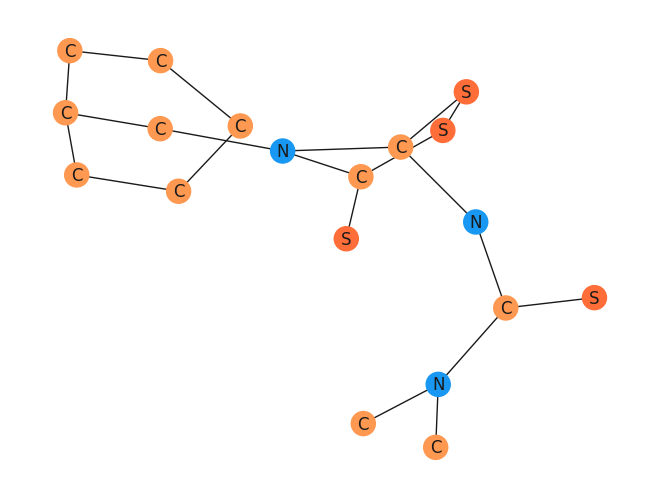

In [8]:
#displaying one sample
plt.clf()
visualize(training_set[5])

# Trial One (No Upsampling)

> In this trial I will try all models without make the data balance to see if i make the data is balanced what will happend

## Preprocessing

In [11]:
#vocabulary size
max_vocab = 500
# maximum length of the tokenized vector
max_len = 100 

# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set]

#training tokenizer
tokenizer = Tokenizer(num_words = max_vocab)
tokenizer.fit_on_texts(all_nodes)

method to prepare single batch set

samples represents the batch of data


Build a _preprocess function which assign integer value to each word in the sequence based on vocabulary and then transform into a matrix using pad_sequences from keras with

* vocab_size = 500
* max_len = 100
* padding = post
* truncationg = post


In [12]:
random.seed(0)

def prepare_single_batch(samples):
  #nodes characters array
  sample_nodes = [s[0] for s in samples]
  #tokenizing the sample nodes
  sample_nodes = tokenizer.texts_to_sequences(sample_nodes)
  #pad_sequences for each sample node with post padding and post truncating 
  sample_nodes = pad_sequences(sample_nodes, padding='post', truncating = 'pre')
  #maximum length of nodes 
  max_nodes_len = np.shape(sample_nodes)[1]
  #defining edges
  edges = [s[1]+i*max_nodes_len for i,s in enumerate(samples)]
  edges = [e for e in edges if len(e) > 0]

  #array definition for segmented_ids
  node_to_graph = [[i]*max_nodes_len for i in range(len(samples))]
  
  #reshaping as 1 vector
  all_nodes = np.reshape(sample_nodes, -1)
  #concatenating all the edges as size [total_edges ,2]
  all_edges = np.concatenate(edges)

  node_to_graph = np.reshape(node_to_graph, -1)
  #returns a dictionary of features(data,edges,node2grah) and label
  return {
      'data': all_nodes,
      'edges': all_edges,
      'node2grah': node_to_graph,
  }, np.array([s[2] for s in samples]) 

**generating batch with given batch_size method**

In [13]:
def gen_batch(dataset, batch_size=16, repeat=False, shuffle=True):
    while True:
      dataset = list(dataset)
      if shuffle:
        #randomly shuffling
        random.shuffle(dataset)
      
      #length of dataset
      l = len(dataset)
      #for creating batches from given dataset
      for ndx in range(0, l, batch_size):
        #creating batch samples with given batch_size
        batch_samples = dataset[ndx:min(ndx + batch_size, l)]
        #returning a generator with prepared batches
        yield prepare_single_batch(batch_samples)
        
      if not repeat:
          break

In [14]:
# showing one batch:
for train_batch in gen_batch(training_set, batch_size=4):
    for k,v in train_batch[0].items():
        print(k)        
        print("Shape is "+str(np.shape(v)))
        pass
    print('label', train_batch[1])
    break

data
Shape is (252,)
edges
Shape is (128, 2)
node2grah
Shape is (252,)
label [0 0 0 0]


##Virtualization Method

> This method for virtualization the results of each model

In [15]:
def results_virt(history):

  # generate a figure containing 3 plots displayed horizontally
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
  fig.suptitle('Model Results')
  
  #first plot
  # first we display the training price accuracy in red color VS. the validation price accuracy in blue color through the epochs
  ax1.plot(history.history['auc'], 'r')
  ax1.plot(history.history['val_auc'], 'b')
  ax1.set_title('model AUC')
  ax1.set_ylabel('AUC')
  ax1.set_xlabel('epochs')
  ax1.legend(['tr_price_auc', 'val_price_auc'])
  ax1.grid()

  #second plot
  # on this axis, we plot the price training loss in red color VS. the price validation loss in blue color through the epochs
  ax2.plot(history.history['loss'], 'r')
  ax2.plot(history.history['val_loss'], 'b')
  ax2.set_title('model loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['tr_loss', 'val_loss'])
  ax2.grid()

# display the figure
  plt.show() 

## Trial_1

> To understand the dimensions:
Let's assume the batch contains 10 samples of data.
The nodes are tokenized using 44 dimension array that is each sample node is of shape [44]
Thus 10 samples are of shape [440] after applying get_batch method
node2graph is also of shape [440] like [0,0,0,0,0,...,1,1,1,1,....2,2,2,....] each number is repeated 44 times [0,0,0,0,... 44 times]
Lets assume edges are of size [257,2]

> The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.


> in this trial i will use the demo to see the results and my expectation to get good results

### build the model architecture

In [16]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch

#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
#embedding layer over data with each token embedded as a vector
embeded = Embedding(tokenizer.num_words, 80)(data)


# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer is 32
params["hidden_dim"] = 32
#gnn layer with defined hyperparameters
gnn_layer = GNN(params)  
#gnn output layer 
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input) 

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
pred = Dense(1, activation='sigmoid')(avg)
#output shape: [batch_size,1]
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn/StatefulPartitionedCall:0', description="created by layer 'gnn'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean/SegmentMean:0', description="created by layer 'tf.math.segment_mean'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense/Sigmoid:0', description="created by layer 'dense'")


### display the model Summary and architecture

In [17]:
#printing summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max (TFOpLambda  ()                  0           ['input_3[0][0]']                
 )                                                                                                
                                                                                                  
 embedding (Embedding)          (None, 80)           40000       ['input_1[0][0]']            

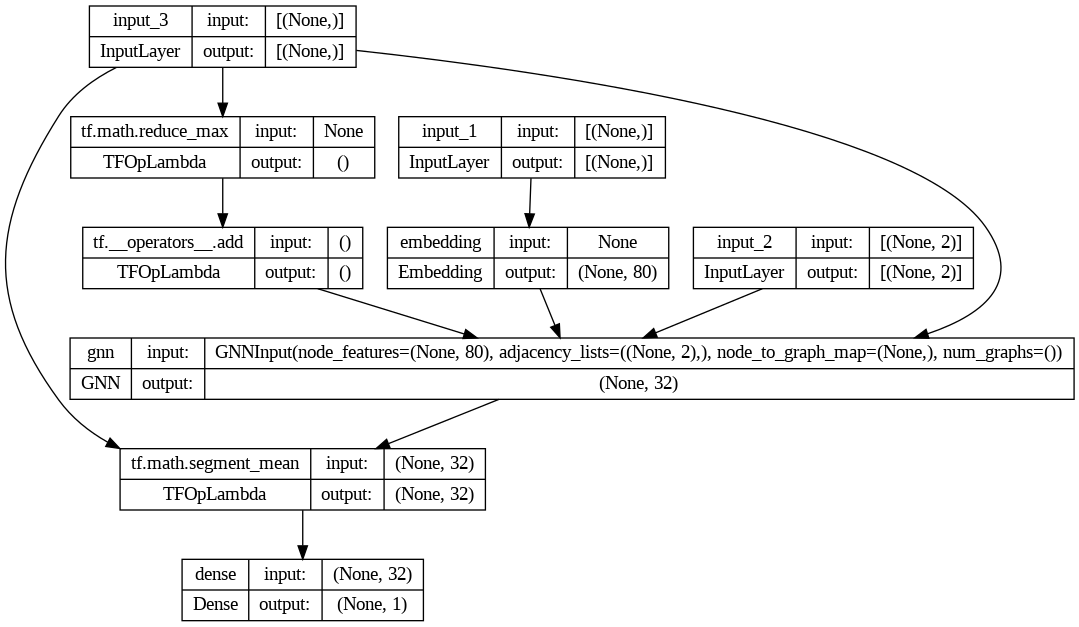

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True)

### compile and fit the model

in this trial i expect to get auc score around 80% for training and get 77% for validation 

In [19]:
#I will create Adam Optimizer for training optimizer with this hyperparameters
ad = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

In [20]:
#compile the model by using my adam optimizer and BinaryCrossentropy loss
model.compile(
    optimizer = ad,
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [21]:
%%time
batch_size = 32
#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)
#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 14.5 µs


In [22]:
#fit the models with 30 epoch and no early stopping
hist = model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
    verbose=1
)
print(hist)

Epoch 1/30
626/626 [==============================] - 31s 23ms/step - loss: 0.2509 - auc: 0.4712 - val_loss: 0.1997 - val_auc: 0.6583
Epoch 2/30
626/626 [==============================] - 9s 15ms/step - loss: 0.1891 - auc: 0.6217 - val_loss: 0.1933 - val_auc: 0.6723
Epoch 3/30
626/626 [==============================] - 11s 17ms/step - loss: 0.1840 - auc: 0.6598 - val_loss: 0.1876 - val_auc: 0.7060
Epoch 4/30
626/626 [==============================] - 10s 16ms/step - loss: 0.1806 - auc: 0.6813 - val_loss: 0.1930 - val_auc: 0.6933
Epoch 5/30
626/626 [==============================] - 10s 16ms/step - loss: 0.1787 - auc: 0.6929 - val_loss: 0.1941 - val_auc: 0.7153
Epoch 6/30
626/626 [==============================] - 9s 15ms/step - loss: 0.1777 - auc: 0.7045 - val_loss: 0.1822 - val_auc: 0.7330
Epoch 7/30
626/626 [==============================] - 10s 16ms/step - loss: 0.1745 - auc: 0.7288 - val_loss: 0.1835 - val_auc: 0.7316
Epoch 8/30
626/626 [==============================] - 10s 16ms/s

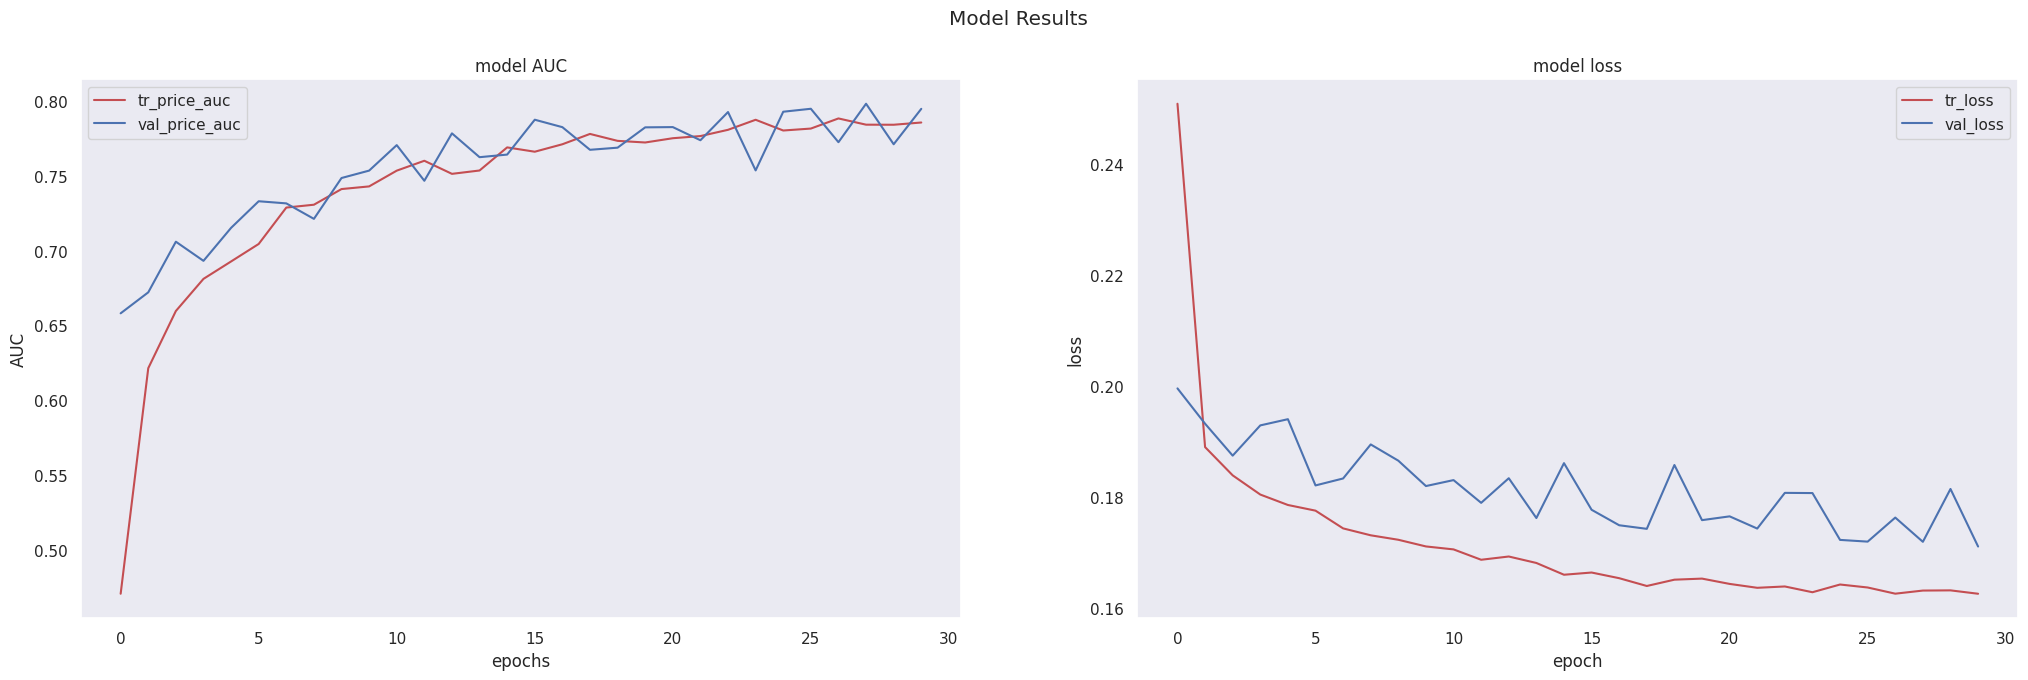

In [23]:
#virtualize the results
results_virt(hist)

In [24]:
#make a prediction by using the model
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

771/771 [==============================] - 4s 5ms/step


In [25]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('Trial_1.csv')

> **As we see this model**
* around 80% training AUC score like i expected
* around 80% validation AUC score better than what i expected so it's good
* so this trial was good for the first trial i do which is not bad for the first trial but I will try anothr trial to see if the model will improve or not

> **my observation for this results**
* this model was good to reach this result as we see from the plots
* this model has this results because this model has normal architecture
* so this model hasn't overfitting and underfitting

## Trial_2 (GGNN)

> in this trial i will use the GGNN model with some dense layers to see if there is any improve or not

### build the model architecture

In [26]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

#embedding layer over data with each token embedded as a vector   size vector eg. [440,75]
embeded = Embedding(tokenizer.num_words, 75)(data)

# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer
params["hidden_dim"] = 32 
params["message_calculation_class"] = 'GGNN'
#params["num_edge_MLP_hidden_layers"] = 16

#gnn layer with defined hyperparameters
gnn_layer = GNN(params) 

#gnn output layer
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
#Output [None,8]
fc1 = Dense(8,activation='relu')(avg)
#fc2 = Dense(64,activation='relu')(fc1)

#output shape: [batch_size,1] 
pred = Dense(1, activation='sigmoid')(fc1)
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model_2 = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_1/StatefulPartitionedCall:0', description="created by layer 'gnn_1'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_1/SegmentMean:0', description="created by layer 'tf.math.segment_mean_1'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")


### display the model Summary and architecture

In [27]:
#printing summary of the model
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_1 (TFOpLamb  ()                  0           ['input_6[0][0]']                
 da)                                                                                              
                                                                                                  
 embedding_1 (Embedding)        (None, 75)           37500       ['input_4[0][0]']          

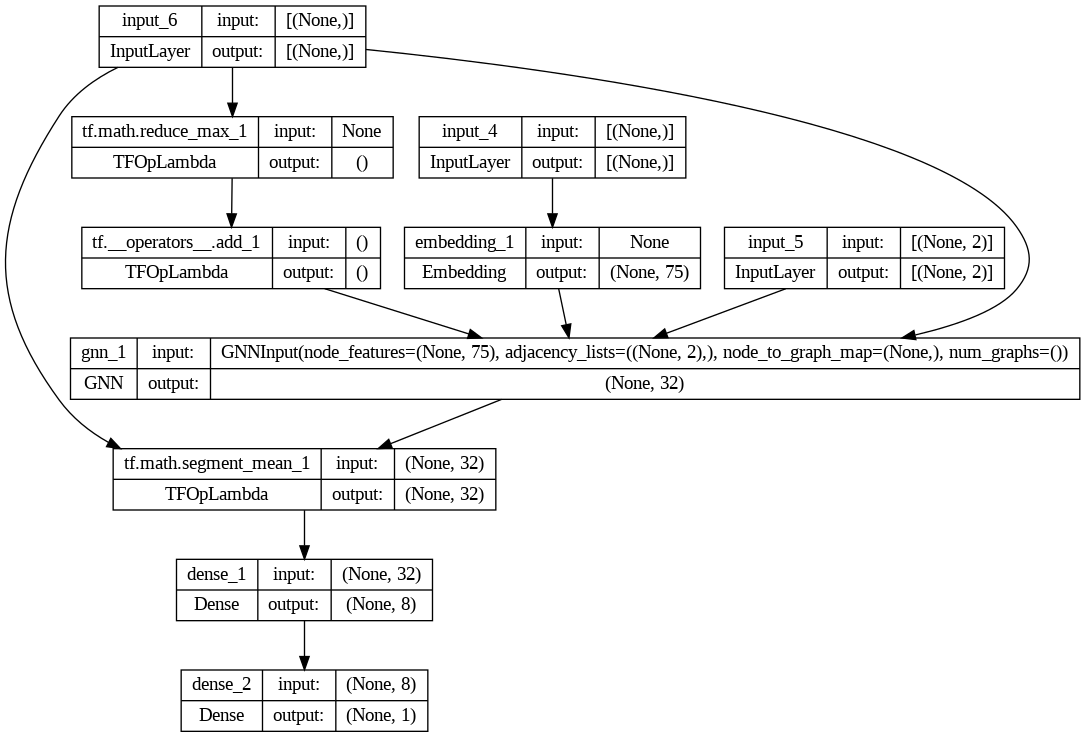

In [28]:
tf.keras.utils.plot_model(model_2, show_shapes=True)

### compile and fit the model

in this trial i expect to get auc score around 85% for training and get 80% for validation because i make some improvement

In [29]:
#I will create Adam Optimizer for training optimizer with this hyperparameters
ad = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

In [30]:
#compile the model by using my adam optimizer and BinaryCrossentropy loss
model_2.compile(
    optimizer = ad, 
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [31]:
batch_size = 32

#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)

#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)



In [32]:
#fit the models with 30 epoch and using early stopping to avoid overfitting
hist_2 = model_2.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
   callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3),
    verbose=1
)
print(hist_2)

Epoch 1/30
626/626 [==============================] - 22s 22ms/step - loss: 0.2050 - auc: 0.5805 - val_loss: 0.1974 - val_auc: 0.6684
Epoch 2/30
626/626 [==============================] - 12s 20ms/step - loss: 0.1840 - auc: 0.6511 - val_loss: 0.1926 - val_auc: 0.6792
Epoch 3/30
626/626 [==============================] - 12s 19ms/step - loss: 0.1782 - auc: 0.6910 - val_loss: 0.1836 - val_auc: 0.7312
Epoch 4/30
626/626 [==============================] - 12s 18ms/step - loss: 0.1749 - auc: 0.7085 - val_loss: 0.1778 - val_auc: 0.7487
Epoch 5/30
626/626 [==============================] - 12s 18ms/step - loss: 0.1717 - auc: 0.7279 - val_loss: 0.1857 - val_auc: 0.7233
Epoch 6/30
626/626 [==============================] - 11s 18ms/step - loss: 0.1698 - auc: 0.7286 - val_loss: 0.1737 - val_auc: 0.7616
Epoch 7/30
626/626 [==============================] - 11s 18ms/step - loss: 0.1677 - auc: 0.7560 - val_loss: 0.1744 - val_auc: 0.7779
Epoch 8/30
626/626 [==============================] - 12s 19ms

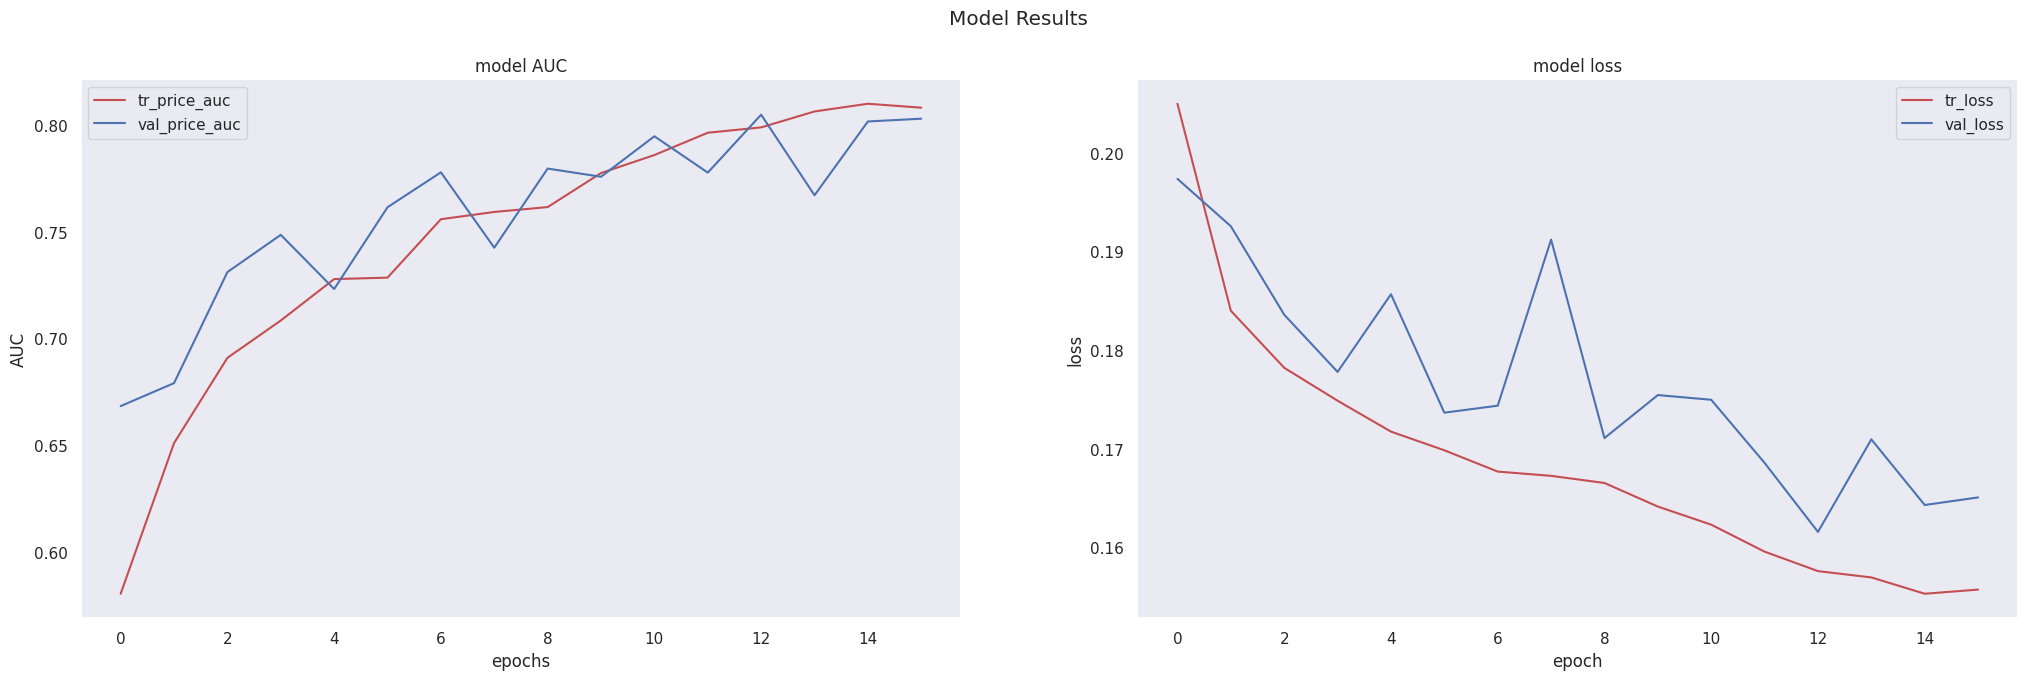

In [33]:
#virtualize the results
results_virt(hist_2)

In [34]:
#make a prediction by using the model
y_pred_2 = model_2.predict(
    gen_batch(testing_set, batch_size=32, shuffle=False)
)
y_pred_2 = np.reshape(y_pred_2, -1)

386/386 [==============================] - 3s 7ms/step


In [35]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred_2})
submission.index.name = 'id'
submission.to_csv('trial_2.csv')

> **As we see this model**
* around 81% training AUC score less than what i expected
* around 80.7% validation AUC score better than what i expected so it's good
* so this trial was good trial but I will try anothr trial to see if the model will improve or not

> **my observation for this results**
* this model was good to reach this result as we see from the plots
* this model has this results because this model has normal architecture with some new layers
* so this model hasn't overfitting and underfitting

## Trial_3 (RGCN)

> in this trial i will use the RGCN model with some dense layers to see if there is any improve or not

### build the model architecture

In [36]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

#embedding layer over data with each token embedded as a vector   size vector eg. [440,75]
embeded = Embedding(tokenizer.num_words, 70)(data)

# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer
params["hidden_dim"] = 32
params["message_calculation_class"] = 'RGCN'
#params["num_edge_MLP_hidden_layers"] = 16

#gnn layer with defined hyperparameters
gnn_layer = GNN(params) 

#gnn output layer
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
#Output [None,8]
fc1 = Dense(64,activation='relu')(avg)
fc2 = Dense(32,activation='relu')(fc1)
d1 = Dropout(0.2)(fc2)

#output shape: [batch_size,1] 
pred = Dense(1, activation='sigmoid')(d1)
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model_3 = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_2/StatefulPartitionedCall:0', description="created by layer 'gnn_2'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_2/SegmentMean:0', description="created by layer 'tf.math.segment_mean_2'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_5/Sigmoid:0', description="created by layer 'dense_5'")


### display the model Summary and architecture

In [37]:
#printing summary of the model
model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_2 (TFOpLamb  ()                  0           ['input_9[0][0]']                
 da)                                                                                              
                                                                                                  
 embedding_2 (Embedding)        (None, 70)           35000       ['input_7[0][0]']          

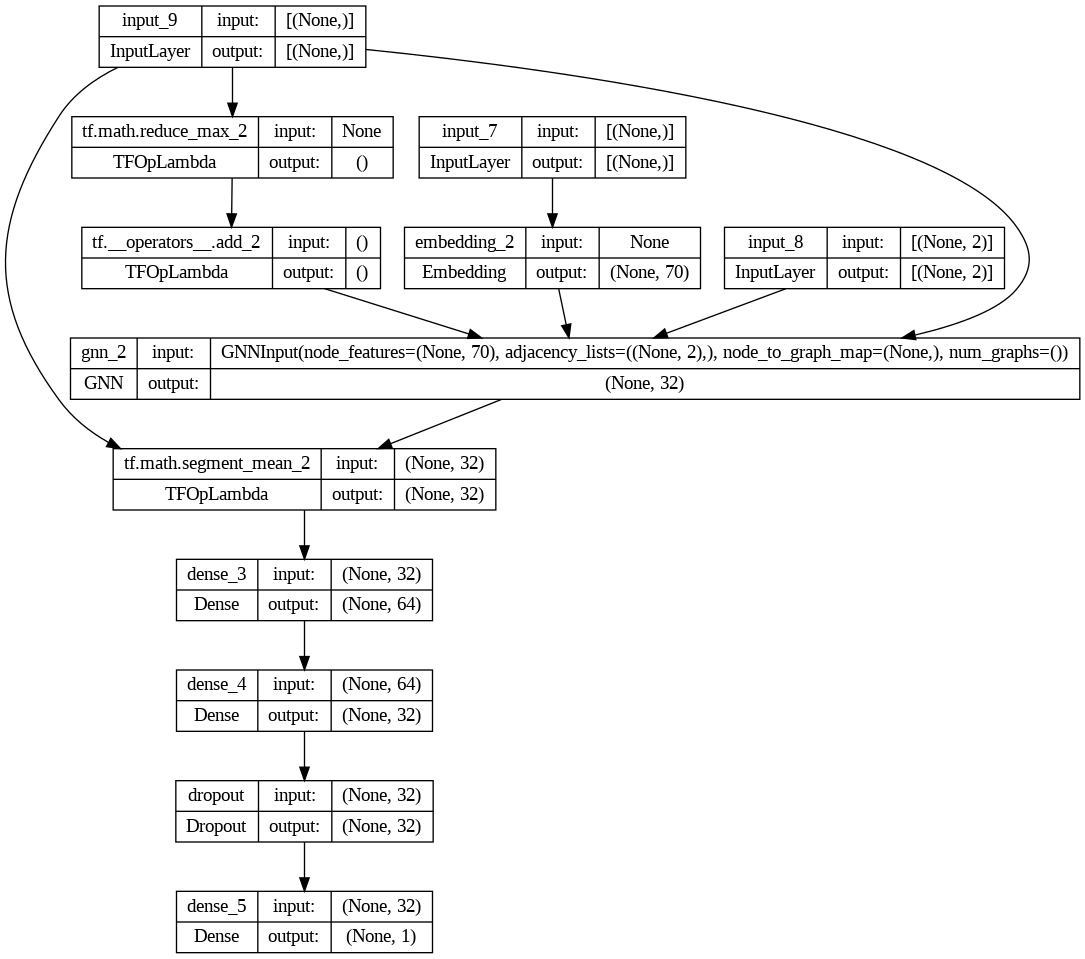

In [38]:
tf.keras.utils.plot_model(model_3, show_shapes=True)

### compile and fit the model

in this trial i expect to get 
auc score around 85% for training and get 
80% for validation 

because i make some improvement

In [39]:
#compile the model by using adam optimizer and BinaryCrossentropy loss
model_3.compile(
    optimizer = 'adam', 
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [40]:
batch_size = 32

#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)

#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)



In [41]:
#fit the models with 30 epoch and not using early stopping 
hist_3 = model_3.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
    #callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3),
    verbose=1
)
print(hist_3)

Epoch 1/30
626/626 [==============================] - 17s 20ms/step - loss: 0.2229 - auc: 0.5398 - val_loss: 0.1940 - val_auc: 0.6829
Epoch 2/30
626/626 [==============================] - 10s 16ms/step - loss: 0.1815 - auc: 0.6826 - val_loss: 0.1868 - val_auc: 0.7175
Epoch 3/30
626/626 [==============================] - 10s 16ms/step - loss: 0.1772 - auc: 0.7056 - val_loss: 0.1823 - val_auc: 0.7305
Epoch 4/30
626/626 [==============================] - 9s 14ms/step - loss: 0.1754 - auc: 0.7165 - val_loss: 0.1858 - val_auc: 0.7299
Epoch 5/30
626/626 [==============================] - 10s 16ms/step - loss: 0.1745 - auc: 0.7175 - val_loss: 0.1869 - val_auc: 0.7444
Epoch 6/30
626/626 [==============================] - 10s 17ms/step - loss: 0.1748 - auc: 0.7130 - val_loss: 0.1786 - val_auc: 0.7531
Epoch 7/30
626/626 [==============================] - 10s 16ms/step - loss: 0.1733 - auc: 0.7216 - val_loss: 0.1844 - val_auc: 0.7573
Epoch 8/30
626/626 [==============================] - 9s 15ms/s

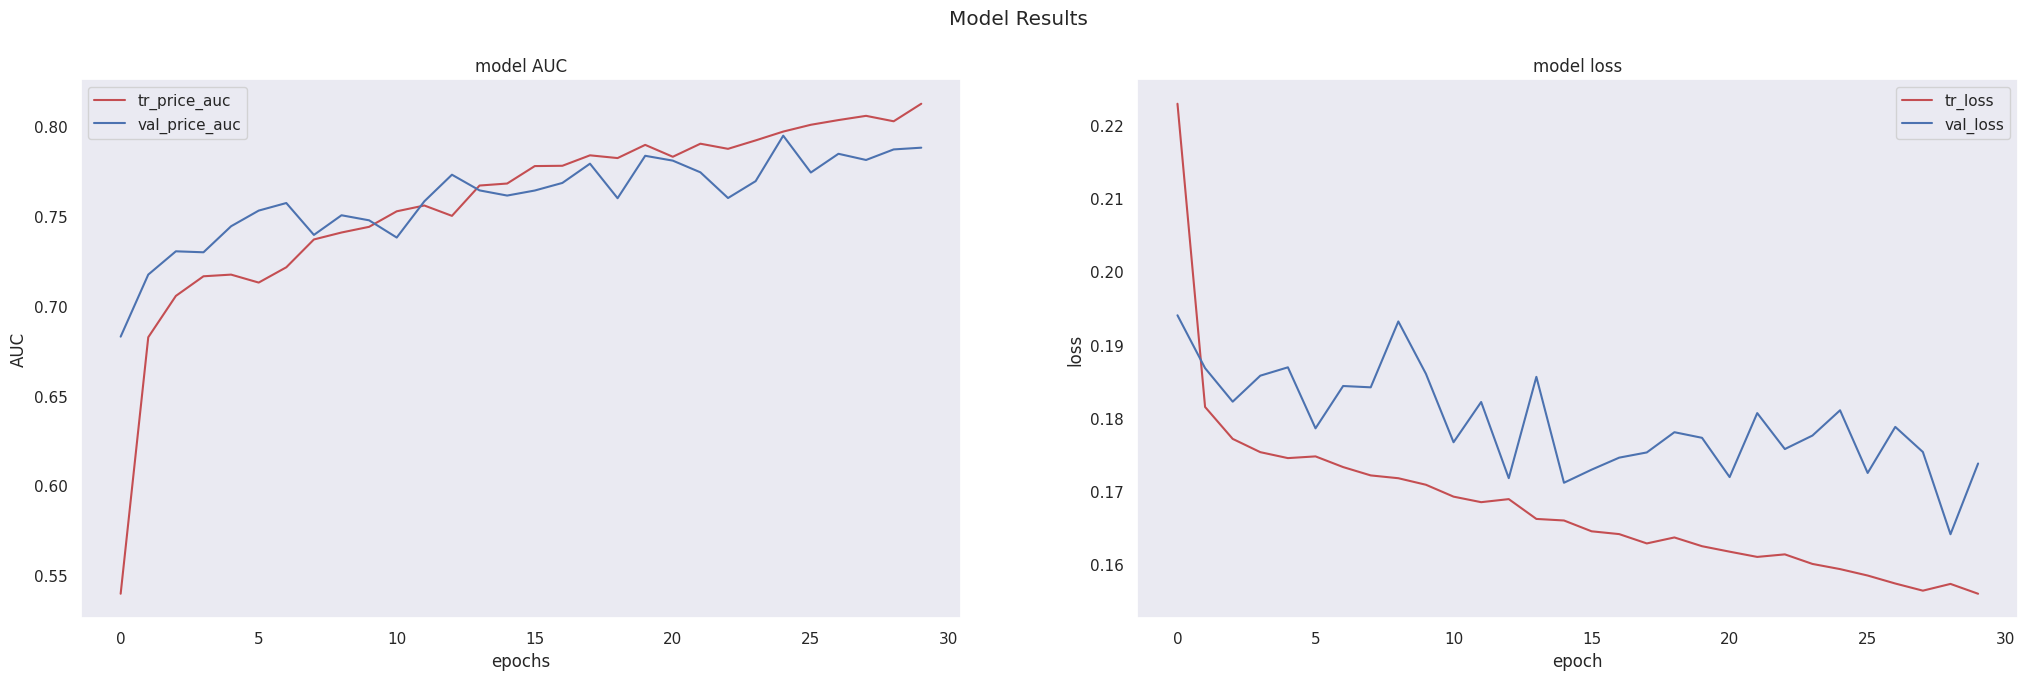

In [42]:
#virtualize the results
results_virt(hist_3)

In [43]:
#make a prediction by using the model
y_pred_3 = model_3.predict(
    gen_batch(testing_set, batch_size=32, shuffle=False)
)
y_pred_3 = np.reshape(y_pred_3, -1)

386/386 [==============================] - 3s 6ms/step


In [44]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred_3})
submission.index.name = 'id'
submission.to_csv('trial_5_RGCN.csv')

> **As we see this model given me**
* around 81.5% training AUC score less than what i expected which so bad
* around 78% validation AUC score less than what i expected so it's not good
* so this trial was not bad and not good trial but I will try anothr trial to see if the model will improve or not

> **my observation for this results**
* this model was not good to reach this result as we see from the plots
* maybe that's happend because of i use very simple architecture so i will try another model with good architecture
* so this model hasn't overfitting and underfitting was gooing to overfitting

## Trial_4 (RGAT)

> in this trial i will use the RGCN model with some dense layers to see if there is any improve or not

### build the model architecture

In [45]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

#embedding layer over data with each token embedded as a vector   size vector eg. [440,75]
embeded = Embedding(tokenizer.num_words, 70)(data)

# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer
params["hidden_dim"] = 32
params["message_calculation_class"] = 'RGAT'
params["num_edge_MLP_hidden_layers"] = 16
params["num_heads"] = 16
# params["num_layers"] = 4
# params["dense_every_num_layers"] = 4



#gnn layer with defined hyperparameters
gnn_layer = GNN(params) 

#gnn output layer
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
#Output [None,8]
fc1 = Dense(64,activation='relu')(avg)
fc2 = Dense(32,activation='relu')(fc1)
# d1 = Dropout(0.2)(fc2)

#output shape: [batch_size,1] 
pred = Dense(1, activation='sigmoid')(fc2)
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model_4 = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_3/StatefulPartitionedCall:0', description="created by layer 'gnn_3'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_3/SegmentMean:0', description="created by layer 'tf.math.segment_mean_3'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_8/Sigmoid:0', description="created by layer 'dense_8'")


### display the model Summary and architecture

In [46]:
#printing summary of the model
model_4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_3 (TFOpLamb  ()                  0           ['input_12[0][0]']               
 da)                                                                                              
                                                                                                  
 embedding_3 (Embedding)        (None, 70)           35000       ['input_10[0][0]']         

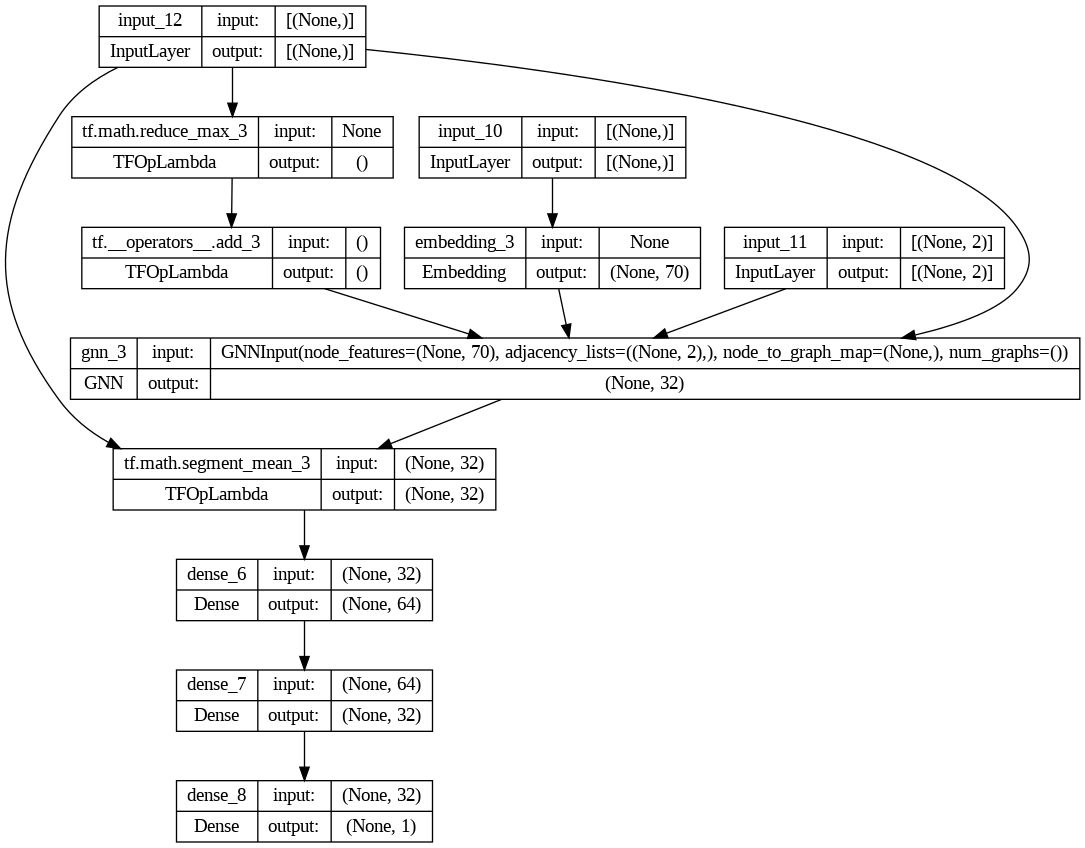

In [47]:
tf.keras.utils.plot_model(model_4, show_shapes=True)

### compile and fit the model

in this trial i expect to get 
* auc score around 85% for training and get 
* 80% for validation 

because i make some improvement

In [48]:
#compile the model by using adam optimizer and BinaryCrossentropy loss
model_4.compile(
    optimizer = 'adam', 
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [49]:
batch_size = 32

#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)

#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)



In [50]:
#fit the models with 30 epoch and using early stopping to avoid overfitting
hist_4 = model_4.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
  #  callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3),
    # verbose=1
)
print(hist_4)

Epoch 1/30
626/626 [==============================] - 53s 63ms/step - loss: 0.2201 - auc: 0.5520 - val_loss: 0.1891 - val_auc: 0.6680
Epoch 2/30
626/626 [==============================] - 38s 61ms/step - loss: 0.1806 - auc: 0.6712 - val_loss: 0.1875 - val_auc: 0.7011
Epoch 3/30
626/626 [==============================] - 38s 60ms/step - loss: 0.1765 - auc: 0.6901 - val_loss: 0.1967 - val_auc: 0.6895
Epoch 4/30
626/626 [==============================] - 37s 60ms/step - loss: 0.1756 - auc: 0.7012 - val_loss: 0.1893 - val_auc: 0.7219
Epoch 5/30
626/626 [==============================] - 38s 60ms/step - loss: 0.1740 - auc: 0.7197 - val_loss: 0.1916 - val_auc: 0.7171
Epoch 6/30
626/626 [==============================] - 37s 59ms/step - loss: 0.1727 - auc: 0.7230 - val_loss: 0.1852 - val_auc: 0.7348
Epoch 7/30
626/626 [==============================] - 36s 58ms/step - loss: 0.1715 - auc: 0.7326 - val_loss: 0.1845 - val_auc: 0.7277
Epoch 8/30
626/626 [==============================] - 36s 57ms

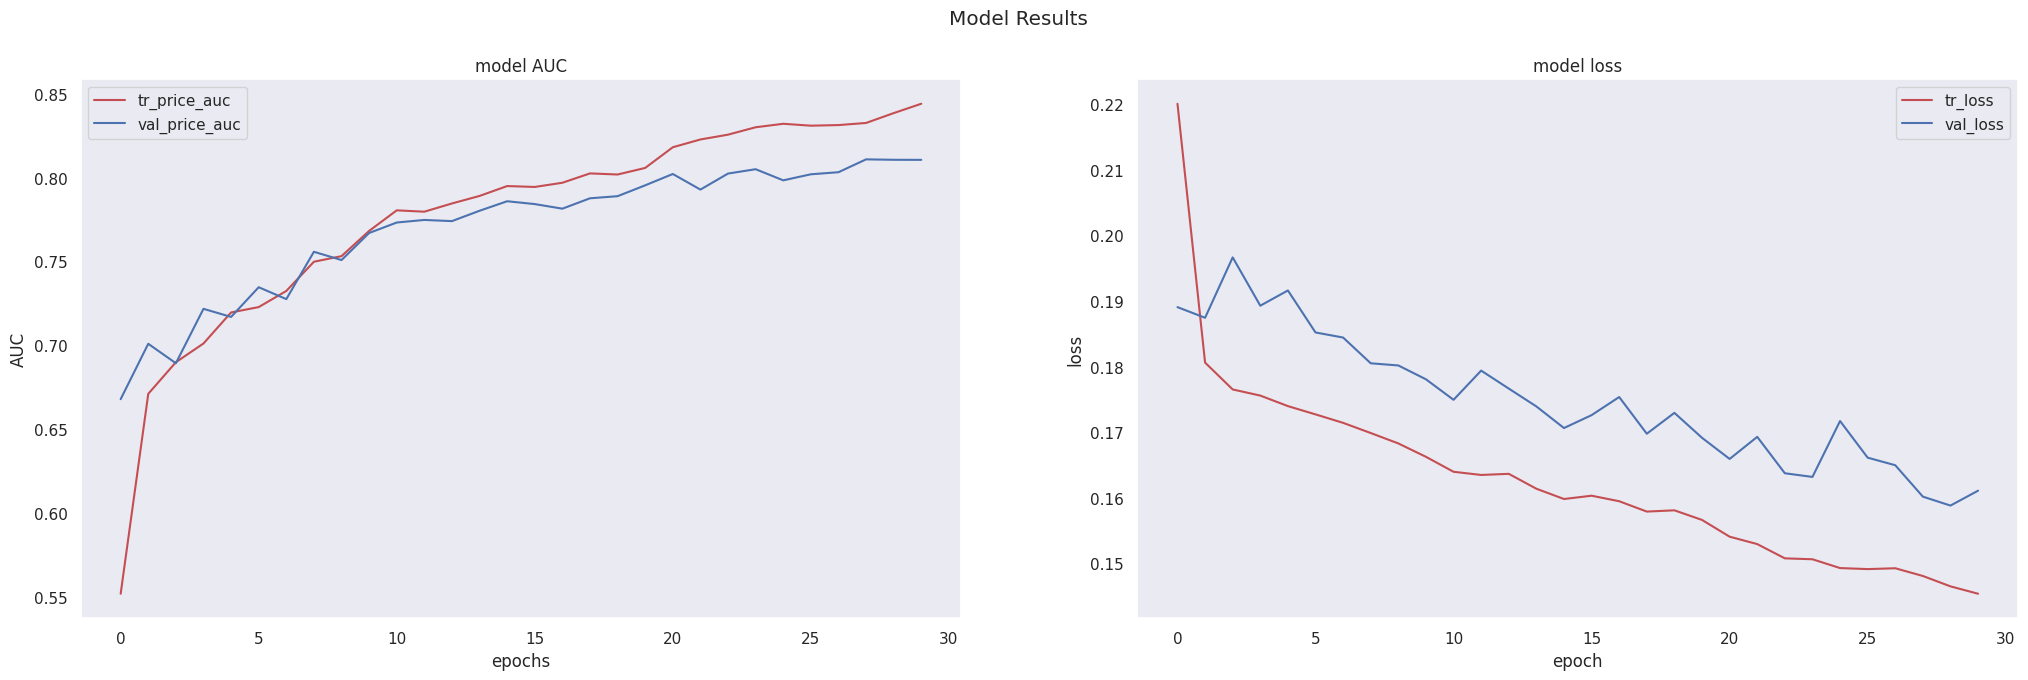

In [51]:
#virtualize the results
results_virt(hist_4)

In [52]:
#make a prediction by using the model
y_pred_4 = model_4.predict(
    gen_batch(testing_set, batch_size=32, shuffle=False)
)
y_pred_4 = np.reshape(y_pred_4, -1)

386/386 [==============================] - 5s 10ms/step


In [53]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred_4})
submission.index.name = 'id'
submission.to_csv('trial_4_RGAT.csv')

> **As we see this model given me**
* around 85.5% training AUC score like what i expected which so good
* around 81% validation AUC score more than what i expected which is so good
* so this trial is the best trial utill now but I will try anothr trial to see if the model will improve or not

> **my observation for this results**
* this model was good to reach this result as we see from the plots
* this model hadn't overfitting or underfitting

## Trial_5 (RGIN)

> in this trial i will use the RGIN model with some dense layers to see if there is any improve or not

### build the model architecture

In [54]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

#embedding layer over data with each token embedded as a vector   size vector eg. [440,75]
embeded = Embedding(tokenizer.num_words, 100)(data)

# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer
params["hidden_dim"] = 32
params["message_calculation_class"] = 'RGIN'
params["num_aggr_MLP_hidden_layers"] = 1
# params["num_edge_MLP_hidden_layers"] = 16
params["num_heads"] = 16
# params["num_layers"] = 4
# params["dense_every_num_layers"] = 4



#gnn layer with defined hyperparameters
gnn_layer = GNN(params) 

#gnn output layer
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
#Output [None,8]
fc1 = Dense(64,activation='relu')(avg)
fc2 = Dense(32,activation='relu')(fc1)
# d1 = Dropout(0.2)(fc2)

#output shape: [batch_size,1] 
pred = Dense(1, activation='sigmoid')(fc2)
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model_5 = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='gnn_4/StatefulPartitionedCall:0', description="created by layer 'gnn_4'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='tf.math.segment_mean_4/SegmentMean:0', description="created by layer 'tf.math.segment_mean_4'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_11/Sigmoid:0', description="created by layer 'dense_11'")


### display the model Summary and architecture

In [55]:
#printing summary of the model
model_5.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_4 (TFOpLamb  ()                  0           ['input_15[0][0]']               
 da)                                                                                              
                                                                                                  
 embedding_4 (Embedding)        (None, 100)          50000       ['input_13[0][0]']         

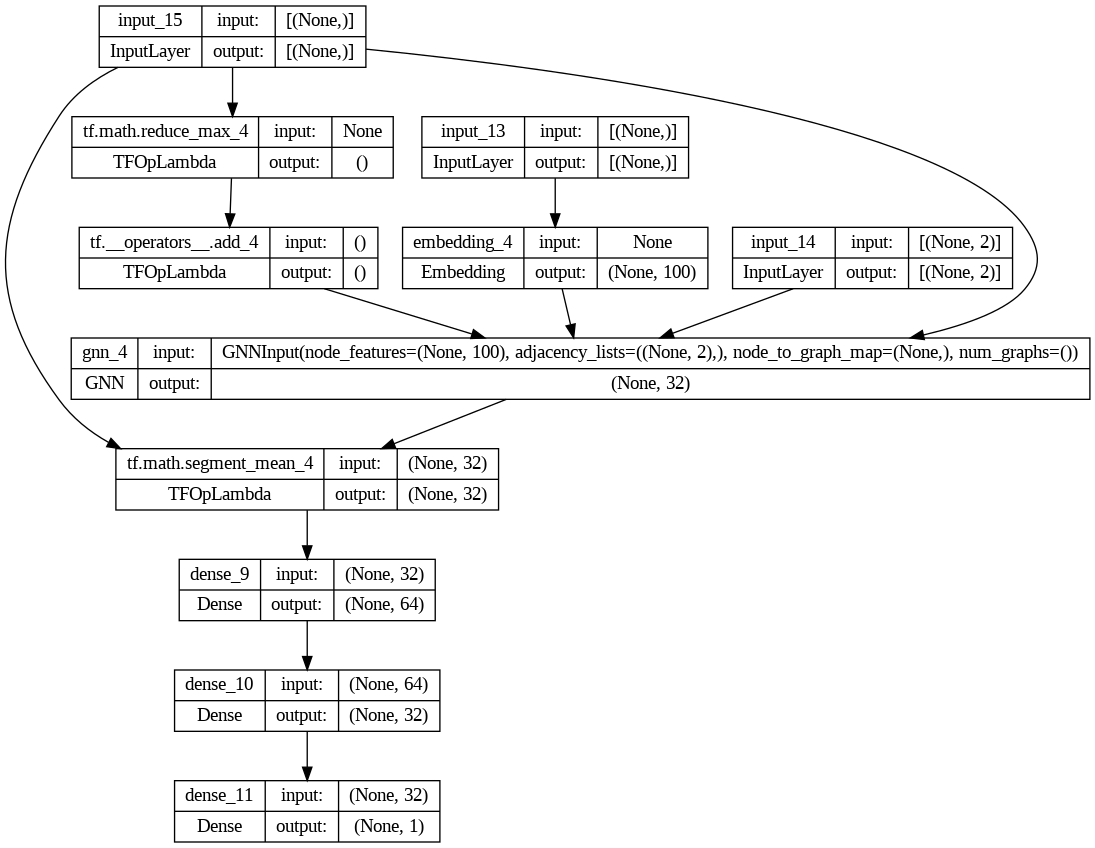

In [56]:
tf.keras.utils.plot_model(model_5, show_shapes=True)

### compile and fit the model

in this trial i expect to get 
* auc score around 85% for training and get 
* 80% for validation 

because i make some improvement

In [57]:
#compile the model by using adam optimizer and BinaryCrossentropy loss
model_5.compile(
    optimizer = 'adam', 
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [58]:
batch_size = 32

#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)

#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)



In [59]:
#fit the models with 30 epoch and using early stopping to avoid overfitting
hist_5 = model_5.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
  #  callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3),
    # verbose=1
)
print(hist_5)

Epoch 1/30
626/626 [==============================] - 20s 21ms/step - loss: 0.2231 - auc: 0.5556 - val_loss: 0.1966 - val_auc: 0.6682
Epoch 2/30
626/626 [==============================] - 11s 18ms/step - loss: 0.1812 - auc: 0.6770 - val_loss: 0.1878 - val_auc: 0.7035
Epoch 3/30
626/626 [==============================] - 11s 17ms/step - loss: 0.1779 - auc: 0.6969 - val_loss: 0.1878 - val_auc: 0.7161
Epoch 4/30
626/626 [==============================] - 19s 30ms/step - loss: 0.1771 - auc: 0.7073 - val_loss: 0.1854 - val_auc: 0.7271
Epoch 5/30
626/626 [==============================] - 12s 19ms/step - loss: 0.1756 - auc: 0.7221 - val_loss: 0.1911 - val_auc: 0.7287
Epoch 6/30
626/626 [==============================] - 10s 17ms/step - loss: 0.1735 - auc: 0.7260 - val_loss: 0.1893 - val_auc: 0.7257
Epoch 7/30
626/626 [==============================] - 11s 17ms/step - loss: 0.1733 - auc: 0.7246 - val_loss: 0.1928 - val_auc: 0.7290
Epoch 8/30
626/626 [==============================] - 10s 16ms

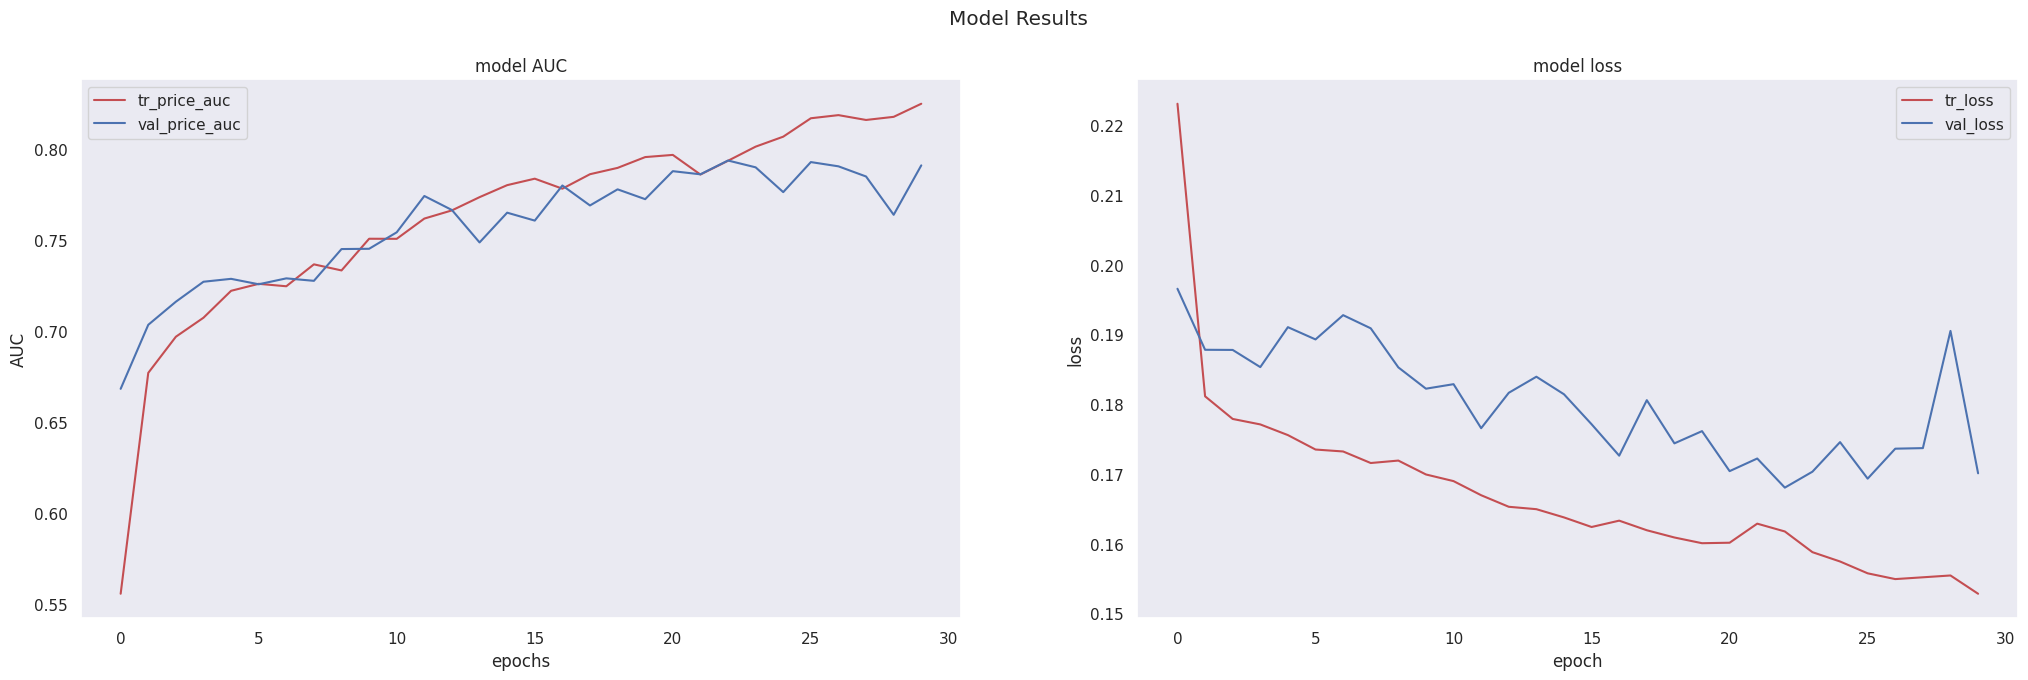

In [60]:
#virtualize the results
results_virt(hist_5)

In [61]:
#make a prediction by using the model
y_pred_5 = model_5.predict(
    gen_batch(testing_set, batch_size=32, shuffle=False)
)
y_pred_5 = np.reshape(y_pred_5, -1)

386/386 [==============================] - 2s 5ms/step


In [62]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred_5})
submission.index.name = 'id'
submission.to_csv('trial_5_RGIN.csv')

> **As we see this model given me**
* around 82.5% training AUC score less than what i expected 
* around 78% validation AUC score less than what i expected
* so this trial is not good trial but I will try anothr trial to see if the model will improve or not

> **my observation for this results**
* this model was good to reach this result as we see from the plots
* this model hadn't overfitting or underfitting
* this model was so slow to reach this results which is not good

## Trial_6 (GNN-Edge-ML)

### build the model architecture

In [63]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

#embedding layer over data with each token embedded as a vector   size vector eg. [440,75]
embeded = Embedding(tokenizer.num_words, 80)(data)

# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer
params["hidden_dim"] = 40
params["message_calculation_class"] = 'gnn_edge_mlp'
params["num_aggr_MLP_hidden_layers"] = 4
params["num_edge_MLP_hidden_layers"] = 4
params["num_heads"] = 4
params["num_layers"] = 4
params["dense_every_num_layers"] = 4



#gnn layer with defined hyperparameters
gnn_layer = GNN(params) 

#gnn output layer
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
#Output [None,8]
fc1 = Dense(64,activation='relu')(avg)
fc2 = Dense(32,activation='relu')(fc1)
# d1 = Dropout(0.2)(fc2)

#output shape: [batch_size,1] 
pred = Dense(1, activation='sigmoid')(fc2)
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model_6 = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='gnn_5/StatefulPartitionedCall:0', description="created by layer 'gnn_5'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='tf.math.segment_mean_5/SegmentMean:0', description="created by layer 'tf.math.segment_mean_5'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_14/Sigmoid:0', description="created by layer 'dense_14'")


### display the model Summary and architecture

In [64]:
#printing summary of the model
model_6.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_5 (TFOpLamb  ()                  0           ['input_18[0][0]']               
 da)                                                                                              
                                                                                                  
 embedding_5 (Embedding)        (None, 80)           40000       ['input_16[0][0]']         

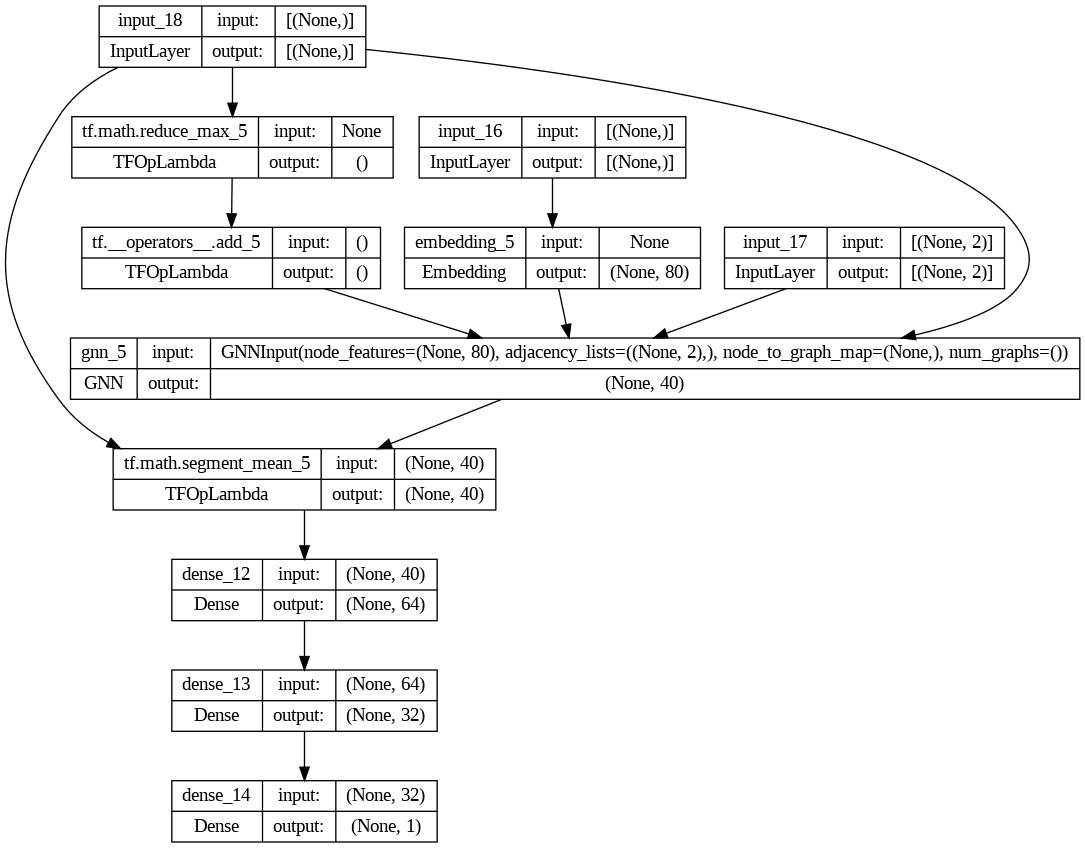

In [65]:
tf.keras.utils.plot_model(model_6, show_shapes=True)

### compile and fit the model

in this trial i expect to get 
* auc score around 85% for training and get 
* 80% for validation 

because i make some improvement

In [66]:
#compile the model by using adam optimizer and BinaryCrossentropy loss
model_6.compile(
    optimizer = 'adam', 
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [67]:
batch_size = 32

#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)

#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)



In [68]:
#fit the models with 30 epoch and using early stopping to avoid overfitting
hist_6 = model_6.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
   callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3),
    # verbose=1
)
print(hist_6)

Epoch 1/30
626/626 [==============================] - 23s 23ms/step - loss: 0.2289 - auc: 0.5607 - val_loss: 0.1915 - val_auc: 0.6760
Epoch 2/30
626/626 [==============================] - 12s 18ms/step - loss: 0.1851 - auc: 0.6446 - val_loss: 0.1943 - val_auc: 0.6946
Epoch 3/30
626/626 [==============================] - 12s 19ms/step - loss: 0.1808 - auc: 0.6816 - val_loss: 0.1964 - val_auc: 0.6940
Epoch 4/30
626/626 [==============================] - 11s 18ms/step - loss: 0.1800 - auc: 0.6891 - val_loss: 0.1900 - val_auc: 0.6857
Epoch 5/30
626/626 [==============================] - 12s 19ms/step - loss: 0.1792 - auc: 0.6967 - val_loss: 0.1971 - val_auc: 0.7143
Epoch 6/30
626/626 [==============================] - 11s 18ms/step - loss: 0.1753 - auc: 0.7174 - val_loss: 0.1887 - val_auc: 0.7181
Epoch 7/30
626/626 [==============================] - 11s 18ms/step - loss: 0.1748 - auc: 0.7123 - val_loss: 0.1873 - val_auc: 0.7161
Epoch 8/30
626/626 [==============================] - 11s 18ms

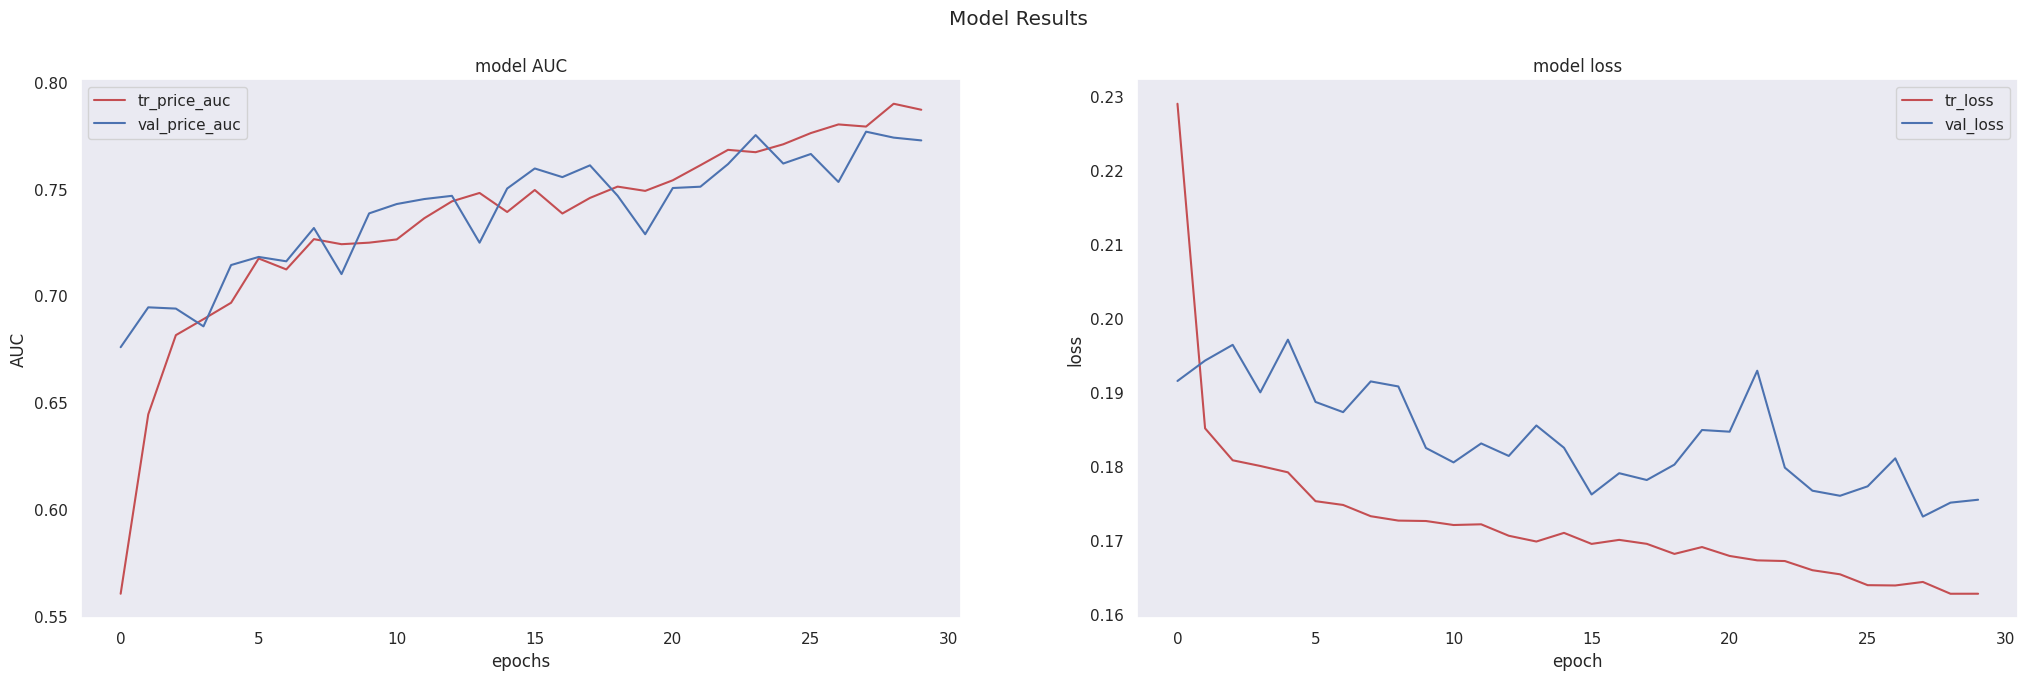

In [69]:
#virtualize the results
results_virt(hist_6)

In [70]:
#make a prediction by using the model
y_pred_6 = model_6.predict(
    gen_batch(testing_set, batch_size=32, shuffle=False)
)
y_pred_6 = np.reshape(y_pred_6, -1)

386/386 [==============================] - 2s 5ms/step


In [71]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred_6})
submission.index.name = 'id'
submission.to_csv('trial_6_GNN-Edge-ML.csv')

> **As we see this model**
* around 78.8% training AUC score less than what i expected which so bad
* around 77% validation AUC score less than what i expected which so bad
* so this trial is not good trial but I will try anothr trial to see if the model will improve or not

> **my observation for this results**
* this model was good to reach this result as we see from the plots
* this model hadn't overfitting or underfitting but was going to overfitting if the model run more than 30 epochs

## Trial_7 (GNN-FiLM)

### build the model architecture

In [72]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

#embedding layer over data with each token embedded as a vector   size vector eg. [440,75]
embeded = Embedding(tokenizer.num_words, 80)(data)

# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer
params["hidden_dim"] = 40
params["message_calculation_class"] = 'GNN_FiLM'
params["num_aggr_MLP_hidden_layers"] = 2
params["num_edge_MLP_hidden_layers"] = 2
params["num_heads"] = 4
params["num_layers"] = 4
params["dense_every_num_layers"] = 1
params["film_parameter_MLP_hidden_layers"] = 1



#gnn layer with defined hyperparameters
gnn_layer = GNN(params) 

#gnn output layer
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
#Output [None,8]
fc1 = Dense(128,activation='relu')(avg)
fc2 = Dense(64,activation='relu')(fc1)
# d1 = Dropout(0.2)(fc2)

#output shape: [batch_size,1] 
pred = Dense(1, activation='sigmoid')(fc2)
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model_7 = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='gnn_6/StatefulPartitionedCall:0', description="created by layer 'gnn_6'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='tf.math.segment_mean_6/SegmentMean:0', description="created by layer 'tf.math.segment_mean_6'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_17/Sigmoid:0', description="created by layer 'dense_17'")


### display the model Summary and architecture

In [73]:
#printing summary of the model
model_7.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_19 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_6 (TFOpLamb  ()                  0           ['input_21[0][0]']               
 da)                                                                                              
                                                                                                  
 embedding_6 (Embedding)        (None, 80)           40000       ['input_19[0][0]']         

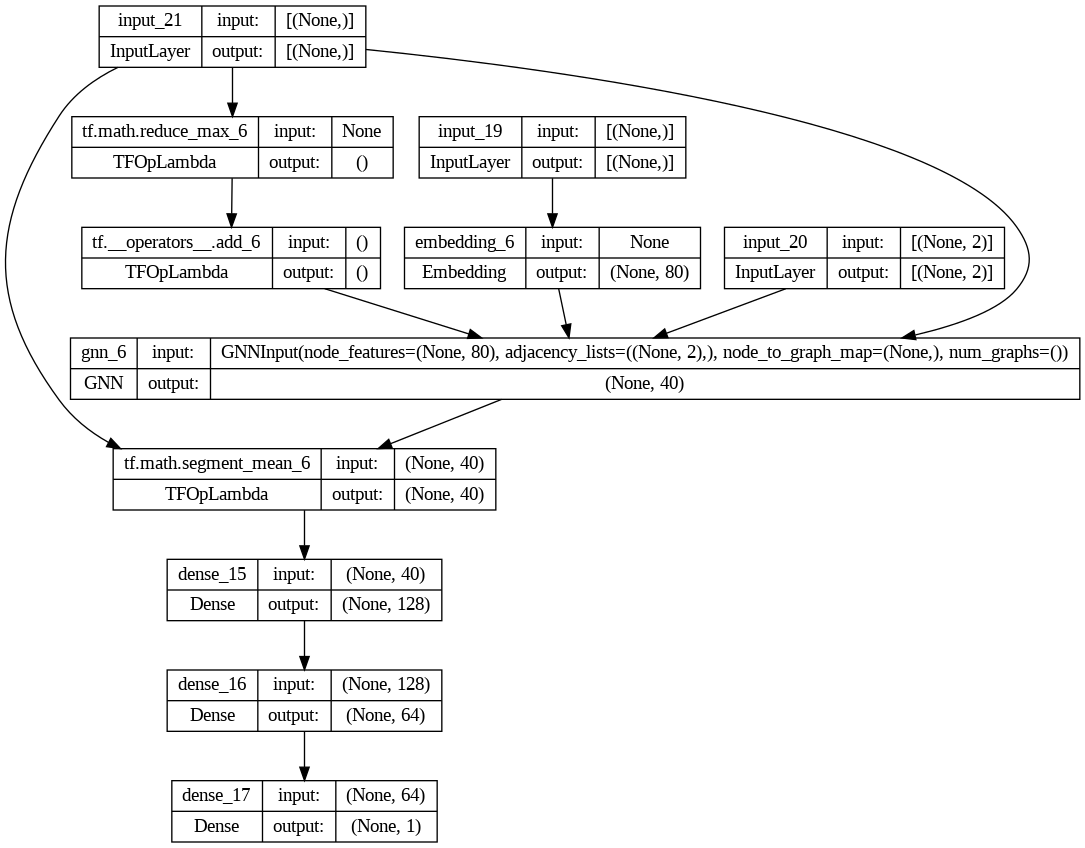

In [74]:
tf.keras.utils.plot_model(model_7, show_shapes=True)

### compile and fit the model

in this trial i expect to get 
* auc score around 85% for training and get 
* 80% for validation 

because i make some improvement

In [75]:
#compile the model by using adam optimizer and BinaryCrossentropy loss
model_7.compile(
    optimizer = 'adam', 
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [76]:
batch_size = 32

#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)

#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)



In [77]:
#fit the models with 30 epoch and using early stopping to avoid overfitting
hist_7 = model_7.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
  #  callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3),
    # verbose=1
)
print(hist_7)

Epoch 1/30
626/626 [==============================] - 22s 23ms/step - loss: 0.2169 - auc: 0.5348 - val_loss: 0.1898 - val_auc: 0.6800
Epoch 2/30
626/626 [==============================] - 13s 20ms/step - loss: 0.1792 - auc: 0.6802 - val_loss: 0.1859 - val_auc: 0.7198
Epoch 3/30
626/626 [==============================] - 12s 20ms/step - loss: 0.1753 - auc: 0.7092 - val_loss: 0.1797 - val_auc: 0.7596
Epoch 4/30
626/626 [==============================] - 12s 20ms/step - loss: 0.1727 - auc: 0.7287 - val_loss: 0.1771 - val_auc: 0.7739
Epoch 5/30
626/626 [==============================] - 12s 20ms/step - loss: 0.1709 - auc: 0.7389 - val_loss: 0.1749 - val_auc: 0.7763
Epoch 6/30
626/626 [==============================] - 13s 20ms/step - loss: 0.1725 - auc: 0.7372 - val_loss: 0.1844 - val_auc: 0.7512
Epoch 7/30
626/626 [==============================] - 12s 20ms/step - loss: 0.1708 - auc: 0.7425 - val_loss: 0.1774 - val_auc: 0.7785
Epoch 8/30
626/626 [==============================] - 13s 20ms

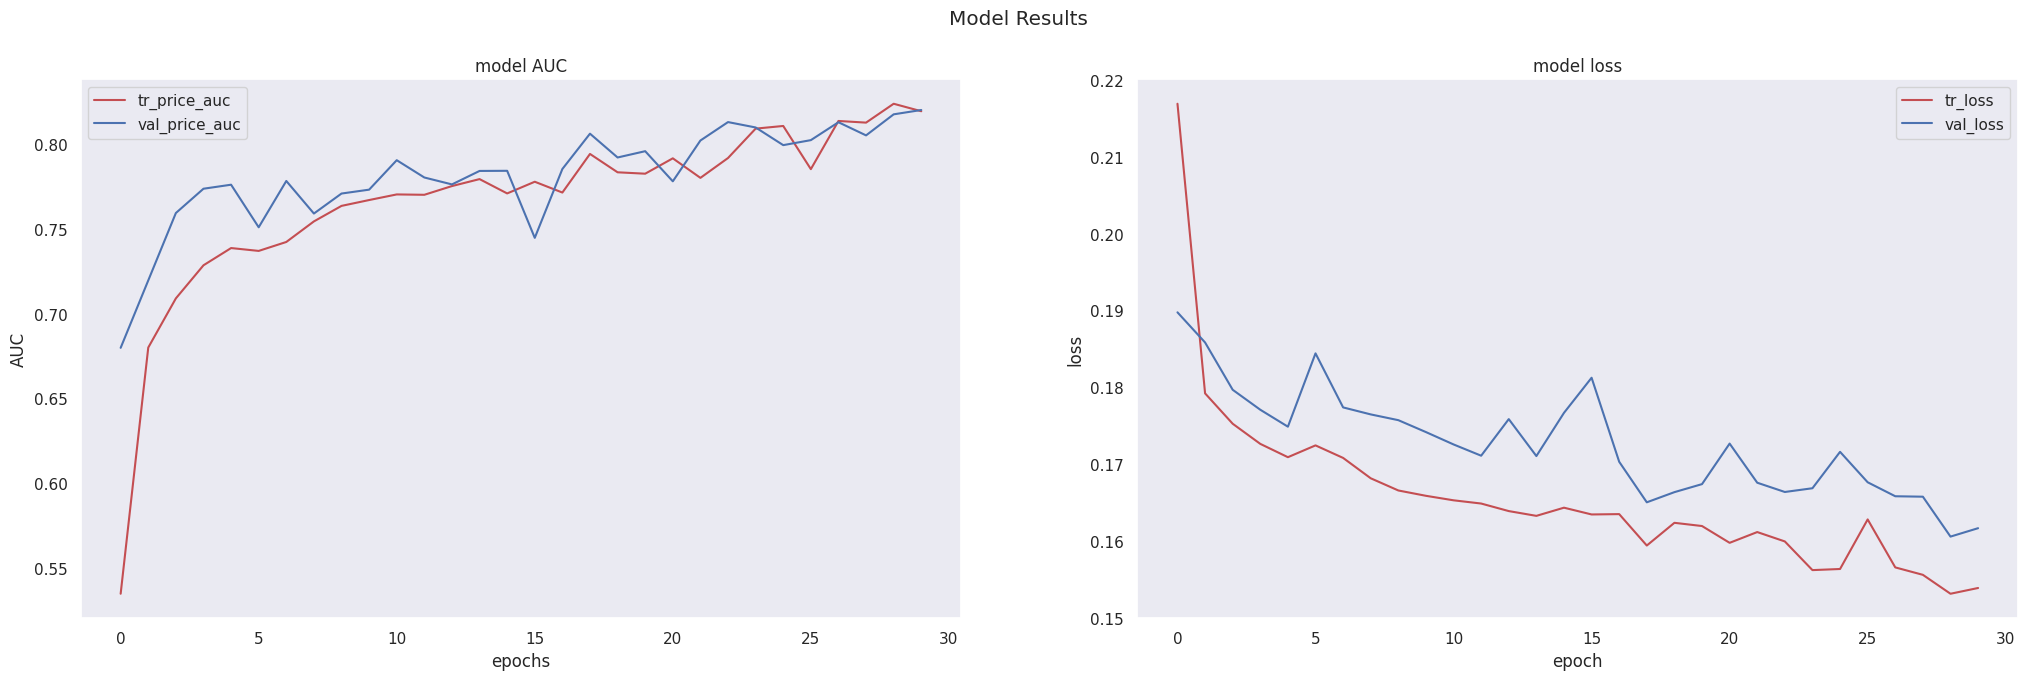

In [78]:
#virtualize the results
results_virt(hist_7)

In [79]:
#make a prediction by using the model
y_pred_7 = model_7.predict(
    gen_batch(testing_set, batch_size=32, shuffle=False)
)
y_pred_7 = np.reshape(y_pred_7, -1)

386/386 [==============================] - 2s 5ms/step


In [80]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred_7})
submission.index.name = 'id'
submission.to_csv('trial_7_GNN_FiLM.csv')

> **As we see this model given me**
* around 82.5% training AUC score less than what i expected
* around 81% validation AUC score look like what i expected which is good
* so this trial is good but not the best one but I will try anothr trial to see if the model will improve or not

> **my observation for this results**
* this model was good to reach this result as we see from the plots
* this model hadn't overfitting or underfitting
* this model was so fast to reach this results which is not good
* this is the good model i built to reach this results

# Trial Two (Upsampling)

> **In this trial, I will manipulate the data to make the data balanced**

## Upsampling

> In this part, I will do data resample to achieve data balance

Read the data 

In [81]:
#reading train.sdf file
training_set_T2 = read_sdf('train.sdf')

  0%|          | 0/25024 [00:00<?, ?it/s]

In [82]:
#checking for data balancing
np.unique(np.array(training_set_T2)[:,2],return_counts=True)

<ipython-input-82-653647176f80>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.unique(np.array(training_set_T2)[:,2],return_counts=True)


(array([0, 1], dtype=object), array([23806,  1218]))

In [83]:
#specify the length of the maximum freqent data to make the both labels have the same number of sample
len_0 = np.unique(np.array(training_set_T2)[:,2],return_counts=True)[1][0]
len_0

<ipython-input-83-b61ba4a89061>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  len_0 = np.unique(np.array(training_set_T2)[:,2],return_counts=True)[1][0]


23806

In [84]:
#convert the data from List to DataFrame to make upsampling
data = pd.DataFrame(np.array(training_set_T2)[:,:], columns = ['0', '1', 'target'])

<ipython-input-84-b7d30b168589>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = pd.DataFrame(np.array(training_set_T2)[:,:], columns = ['0', '1', 'target'])


In [85]:
#checking for the number of index in the data before and after converting
len(data) == len(training_set_T2)

True

Using resample method to make upsampling

In [87]:
from sklearn.utils import resample

resampling = data.copy()  #take a copy of dataframe to make resampling
class_0 = resampling[resampling['target']==0]   #specify all rows which has target zero
class_1 = resampling[resampling['target']==1]   #specify all rows which has target one
class_1_after = resample(class_1, replace=True,n_samples = len_0)   #add data records to data frame with value one to make the number of rows which has target 0 == number of rows whic has target 1
df_upsampled = pd.concat([class_0, class_1_after])    #add the new rows to the new data frame

In [88]:
# Display new class counts
df_upsampled['target'].value_counts()

0    23806
1    23806
Name: target, dtype: int64

In [90]:
#converting the upsampled DataFrame into list again to be easy to use the preprocessing methods on it
training_set_T2 = df_upsampled.values.tolist()

In [91]:
#splitting the train data into training and validation
training_set, validation_set = train_test_split(training_set_T2, test_size=0.15)
print(type(training_set))

<class 'list'>


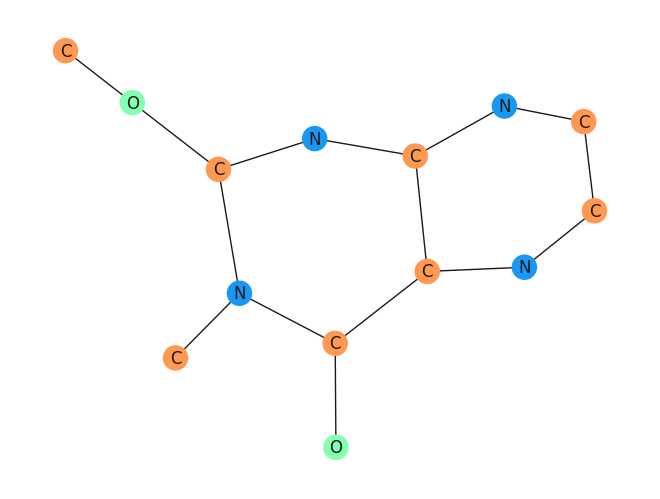

In [92]:
#displaying one sample
plt.clf()
visualize(training_set_T2[5])

## Preprocessing

> Here I will apply the preprocessing methods

In [93]:
#vocabulary size
max_vocab = 500
# maximum length of the tokenized vector
max_len = 100 

# build vocabulary from training set only for nodes characters
all_nodes = [s[0] for s in training_set_T2]

#training tokenizer
tokenizer = Tokenizer(num_words = max_vocab)
tokenizer.fit_on_texts(all_nodes)

In [94]:
# showing one batch:
for train_batch in gen_batch(training_set_T2, batch_size=4):
    for k,v in train_batch[0].items():
        print(k)  
        print("Shape is "+str(np.shape(v)))
        pass
    print('label', train_batch[1])
    break

data
Shape is (152,)
edges
Shape is (113, 2)
node2grah
Shape is (152,)
label [0 0 0 0]


## Trial_1

> To understand the dimensions:
Let's assume the batch contains 10 samples of data.
The nodes are tokenized using 44 dimension array that is each sample node is of shape [44]
Thus 10 samples are of shape [440] after applying get_batch method
node2graph is also of shape [440] like [0,0,0,0,0,...,1,1,1,1,....2,2,2,....] each number is repeated 44 times [0,0,0,0,... 44 times]
Lets assume edges are of size [257,2]

> The GNN layer takes a GNNInput named tuple as input, which encapsulates initial node features, adjacency lists, and auxiliary information.


> in this trial i will use the demo to see the results and my expectation to get good results

### build the model architecture

In [95]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch

#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)
#embedding layer over data with each token embedded as a vector
embeded = Embedding(tokenizer.num_words, 80)(data)


# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer is 40
params["hidden_dim"] = 40
#gnn layer with defined hyperparameters
gnn_layer = GNN(params)  
#gnn output layer 
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input) 

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
pred = Dense(1, activation='sigmoid')(avg)
#output shape: [batch_size,1]
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='gnn_7/StatefulPartitionedCall:0', description="created by layer 'gnn_7'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='tf.math.segment_mean_7/SegmentMean:0', description="created by layer 'tf.math.segment_mean_7'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_18/Sigmoid:0', description="created by layer 'dense_18'")


### display the model Summary and architecture

In [96]:
#printing summary of the model
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_22 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_7 (TFOpLamb  ()                  0           ['input_24[0][0]']               
 da)                                                                                              
                                                                                                  
 embedding_7 (Embedding)        (None, 80)           40000       ['input_22[0][0]']         

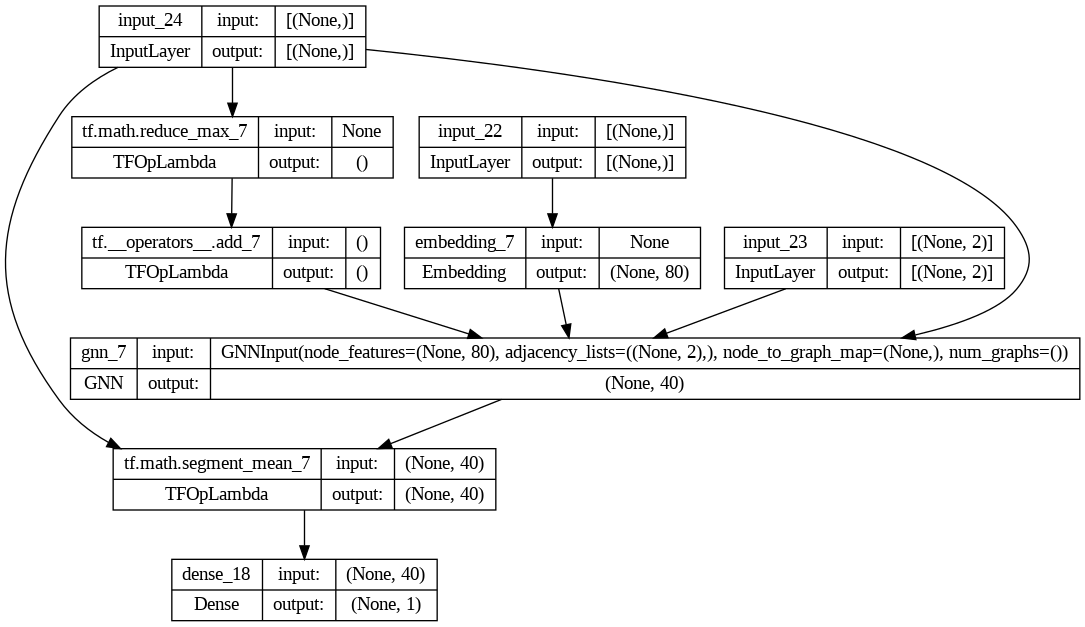

In [97]:
tf.keras.utils.plot_model(model, show_shapes=True)

### compile and fit the model

in this trial i expect to get 
* auc score around 85% for training and get 
* 80% for validation 

because i make some improvement

In [98]:
#I will create Adam Optimizer for training optimizer with this hyperparameters
ad = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

In [99]:
#compile the model by using my adam optimizer and BinaryCrossentropy loss
model.compile(
    optimizer = ad,
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [100]:
%%time
batch_size = 32
#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)
#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)

CPU times: user 13 µs, sys: 0 ns, total: 13 µs
Wall time: 19.1 µs


In [101]:
#fit the models with 30 epoch and no early stopping
hist = model.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
    verbose=1
)
print(hist)

Epoch 1/30
1265/1265 [==============================] - 27s 18ms/step - loss: 0.6184 - auc: 0.7164 - val_loss: 0.5931 - val_auc: 0.7494
Epoch 2/30
1265/1265 [==============================] - 19s 15ms/step - loss: 0.5887 - auc: 0.7540 - val_loss: 0.5887 - val_auc: 0.7529
Epoch 3/30
1265/1265 [==============================] - 20s 16ms/step - loss: 0.5761 - auc: 0.7687 - val_loss: 0.5705 - val_auc: 0.7769
Epoch 4/30
1265/1265 [==============================] - 18s 14ms/step - loss: 0.5640 - auc: 0.7805 - val_loss: 0.5524 - val_auc: 0.7914
Epoch 5/30
1265/1265 [==============================] - 20s 16ms/step - loss: 0.5521 - auc: 0.7920 - val_loss: 0.5471 - val_auc: 0.7985
Epoch 6/30
1265/1265 [==============================] - 19s 15ms/step - loss: 0.5378 - auc: 0.8044 - val_loss: 0.5333 - val_auc: 0.8102
Epoch 7/30
1265/1265 [==============================] - 20s 16ms/step - loss: 0.5282 - auc: 0.8134 - val_loss: 0.5163 - val_auc: 0.8267
Epoch 8/30
1265/1265 [==========================

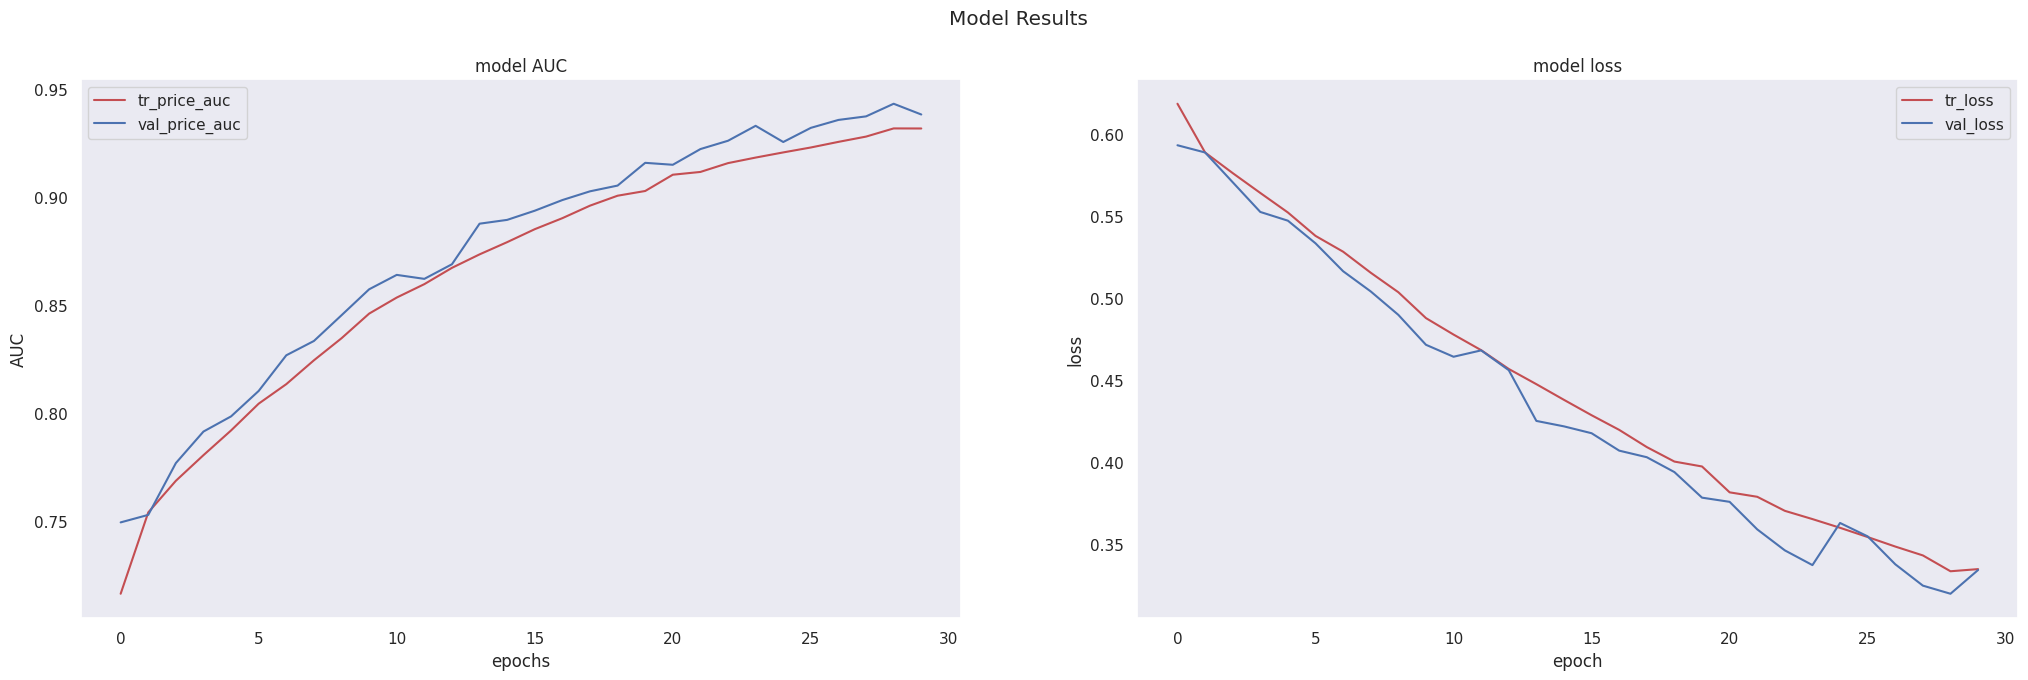

In [102]:
#virtualize the results
results_virt(hist)

In [103]:
#make a prediction by using the model
y_pred = model.predict(
    gen_batch(testing_set, batch_size=16, shuffle=False)
)
y_pred = np.reshape(y_pred, -1)

771/771 [==============================] - 5s 5ms/step


In [104]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred})
submission.index.name = 'id'
submission.to_csv('Trial_2_1.csv')

> **As we see this model given me**
* around 93.1% training AUC score which is highest high than what i expected and very good
* around 93.8% validation AUC score better than what i expected and this is the highest score i get untill now
* so this trial was good for the first trial with resampling i do which is not bad for the first trial but I will try anothr trial to see if the model will improve or not

> **my observation for this results**
* this model was good to reach this result as we see from the plots
* this model has hiegh AUC scores but also has high losses which it's not good but not bad
* this model has this results because this model has normal architecture
* so this model hasn't overfitting and underfitting

## Trial_2 (GGNN)

### build the model architecture

In [105]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

#embedding layer over data with each token embedded as a vector   size vector eg. [440,75]
embeded = Embedding(tokenizer.num_words, 80)(data)

# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer
params["message_calculation_class"] = 'GGNN'
params["hidden_dim"] = 40
params["num_aggr_MLP_hidden_layers"] = 2
params["num_edge_MLP_hidden_layers"] = 2
params["num_heads"] = 8
params["num_layers"] = 4
params["dense_every_num_layers"] = 1
params["film_parameter_MLP_hidden_layers"] = 1


#gnn layer with defined hyperparameters
gnn_layer = GNN(params) 

#gnn output layer
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
#Output [None,8]
fc1 = Dense(128,activation='relu')(avg)
fc2 = Dense(64,activation='relu')(fc1)

#output shape: [batch_size,1] 
pred = Dense(1, activation='sigmoid')(fc2)
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model_2 = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='gnn_8/StatefulPartitionedCall:0', description="created by layer 'gnn_8'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='tf.math.segment_mean_8/SegmentMean:0', description="created by layer 'tf.math.segment_mean_8'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_21/Sigmoid:0', description="created by layer 'dense_21'")


### display the model Summary and architecture

In [106]:
#printing summary of the model
model_2.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_27 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_25 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_8 (TFOpLamb  ()                  0           ['input_27[0][0]']               
 da)                                                                                              
                                                                                                  
 embedding_8 (Embedding)        (None, 80)           40000       ['input_25[0][0]']         

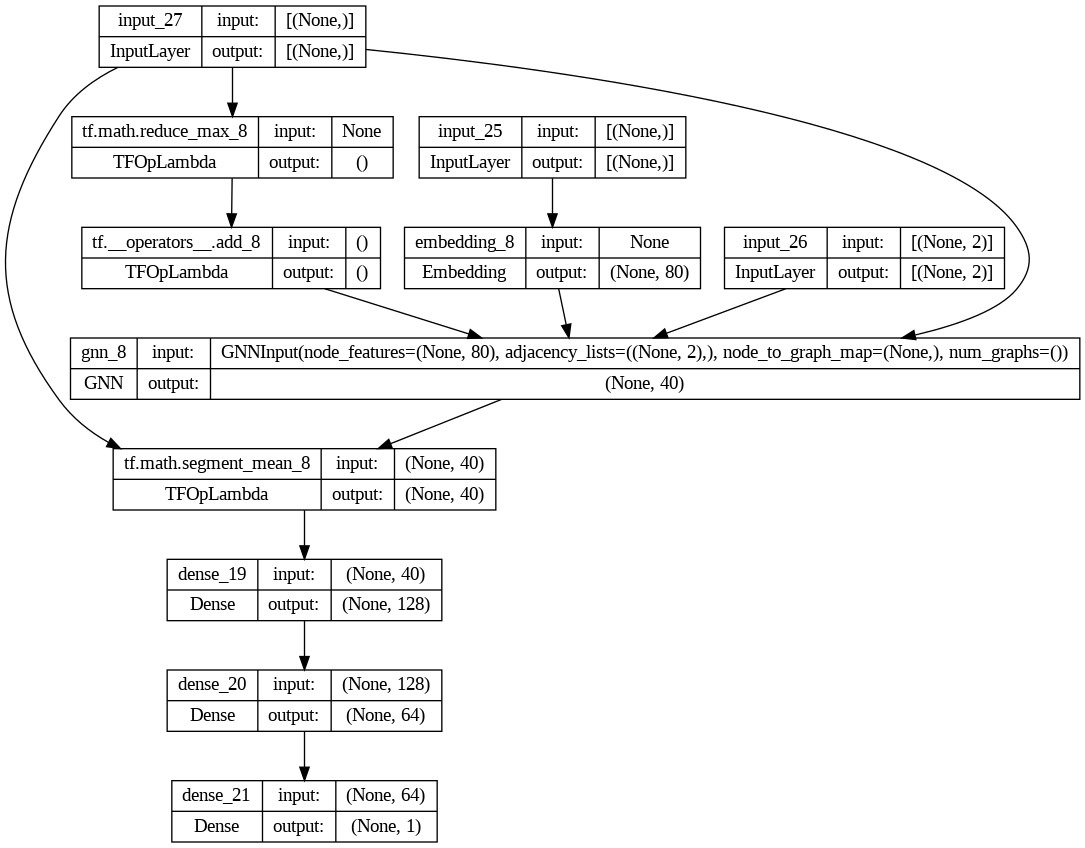

In [107]:
tf.keras.utils.plot_model(model_2, show_shapes=True)

### compile and fit the model

in this trial i expect to get 
* auc score around 95% for training and get 
* 90% for validation 

because i make some improvement

In [108]:
#compile the model by using my adam optimizer and BinaryCrossentropy loss
model_2.compile(
    optimizer = 'adam', 
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [109]:
batch_size = 64

#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)

#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)



In [110]:
#fit the models with 30 epoch and using early stopping to avoid overfitting
hist_2 = model_2.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
   callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3),
    verbose=1
)
print(hist_2)

Epoch 1/30
633/633 [==============================] - 26s 27ms/step - loss: 0.6362 - auc: 0.6862 - val_loss: 0.6338 - val_auc: 0.7160
Epoch 2/30
633/633 [==============================] - 15s 24ms/step - loss: 0.5841 - auc: 0.7560 - val_loss: 0.5827 - val_auc: 0.7567
Epoch 3/30
633/633 [==============================] - 15s 23ms/step - loss: 0.5575 - auc: 0.7860 - val_loss: 0.5418 - val_auc: 0.8057
Epoch 4/30
633/633 [==============================] - 15s 24ms/step - loss: 0.5242 - auc: 0.8172 - val_loss: 0.5186 - val_auc: 0.8298
Epoch 5/30
633/633 [==============================] - 14s 22ms/step - loss: 0.5035 - auc: 0.8339 - val_loss: 0.4924 - val_auc: 0.8426
Epoch 6/30
633/633 [==============================] - 14s 23ms/step - loss: 0.4803 - auc: 0.8512 - val_loss: 0.4724 - val_auc: 0.8602
Epoch 7/30
633/633 [==============================] - 15s 23ms/step - loss: 0.4628 - auc: 0.8631 - val_loss: 0.4466 - val_auc: 0.8746
Epoch 8/30
633/633 [==============================] - 14s 22ms

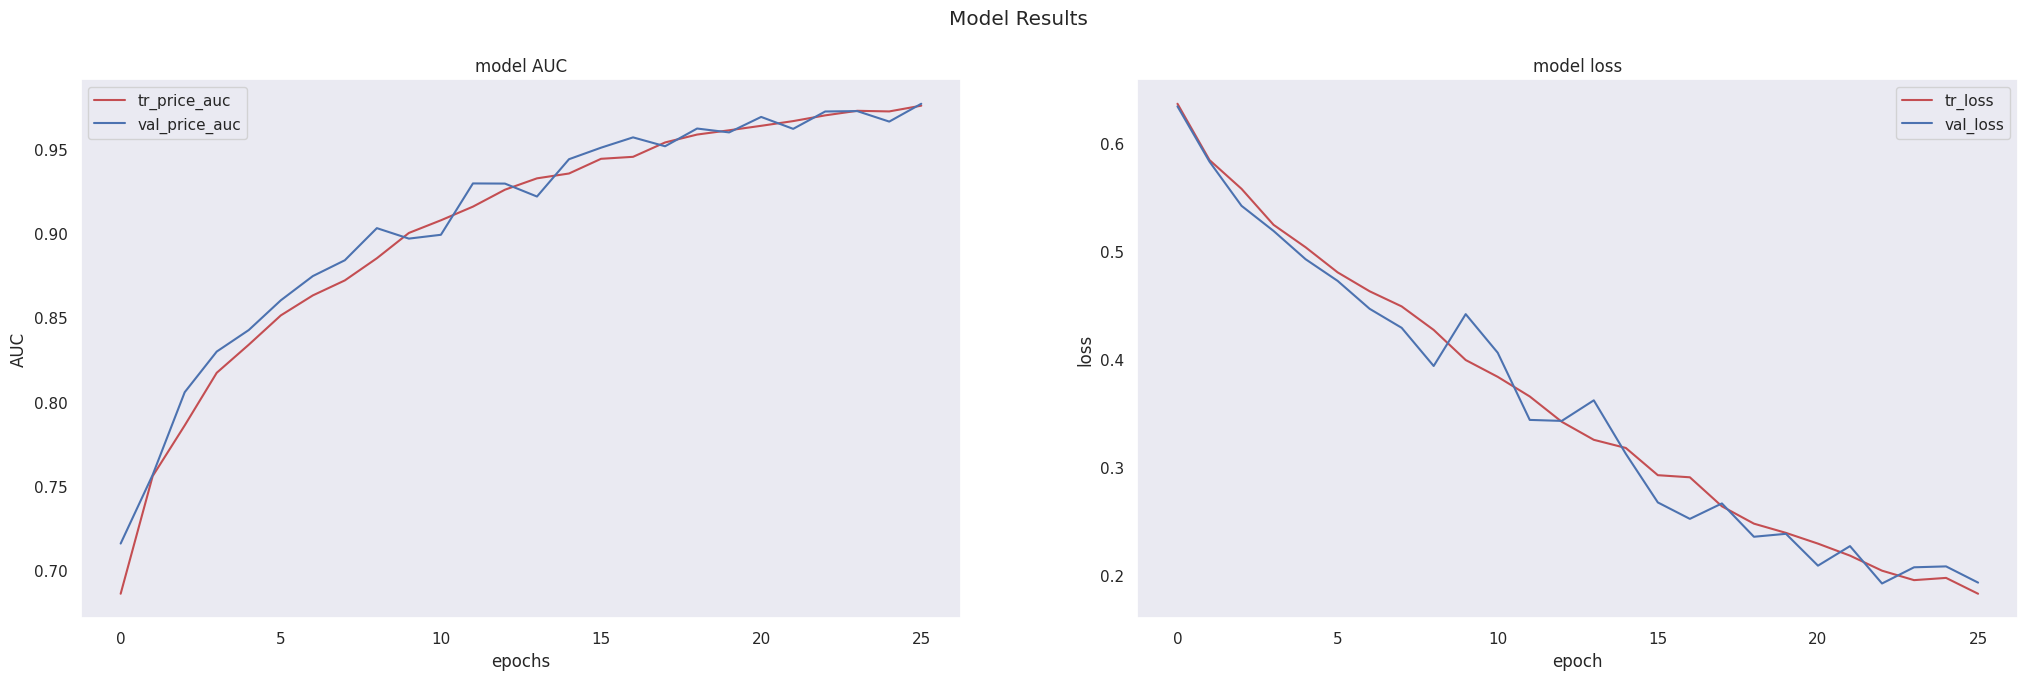

In [111]:
#virtualize the results
results_virt(hist_2)

In [112]:
#make a prediction by using the model
y_pred_2 = model_2.predict(
    gen_batch(testing_set, batch_size=32, shuffle=False)
)
y_pred_2 = np.reshape(y_pred_2, -1)

386/386 [==============================] - 3s 6ms/step


In [113]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred_2})
submission.index.name = 'id'
submission.to_csv('trial_2.csv')

> **As we see this model given me**
* around 97.5% training AUC score highest than what i expected and so good
* around 97.6% validation AUC score better than what i expected so it's good and this is the best one until now
* so this trial was the best trial but I will try anothr trial to see if the model will improve or not

    **[the highest score i get so this model is the best model until now]**
> **my observation for this results**
* this model was good to reach this result as we see from the plots
* this model is very good has high scores and has low losses so ***this model is the best model***
* this model hadn't overfitting or underfitting

## Trial_3 (RGCN)

> in this trial i will use the RGCN model with some dense layers to see if there is any improve or not

### build the model architecture

In [114]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

#embedding layer over data with each token embedded as a vector   size vector eg. [440,75]
embeded = Embedding(tokenizer.num_words, 70)(data)

# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer

params["message_calculation_class"] = 'RGCN'
params["hidden_dim"] = 40
params["num_aggr_MLP_hidden_layers"] = 2
params["num_edge_MLP_hidden_layers"] = 2
params["num_heads"] = 8
params["num_layers"] = 4
params["dense_every_num_layers"] = 1
params["film_parameter_MLP_hidden_layers"] = 1

#params["num_edge_MLP_hidden_layers"] = 16

#gnn layer with defined hyperparameters
gnn_layer = GNN(params) 

#gnn output layer
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
#Output [None,8]
fc1 = Dense(256,activation='relu')(avg)
fc2 = Dense(128,activation='relu')(fc1)
fc3 = Dense(64,activation='relu')(fc2)
# d1 = Dropout(0.2)(fc2)

#output shape: [batch_size,1] 
pred = Dense(1, activation='sigmoid')(fc3)
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model_3 = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='gnn_9/StatefulPartitionedCall:0', description="created by layer 'gnn_9'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='tf.math.segment_mean_9/SegmentMean:0', description="created by layer 'tf.math.segment_mean_9'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_25/Sigmoid:0', description="created by layer 'dense_25'")


### display the model Summary and architecture

In [115]:
#printing summary of the model
model_3.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_30 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_28 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_9 (TFOpLamb  ()                  0           ['input_30[0][0]']               
 da)                                                                                              
                                                                                                  
 embedding_9 (Embedding)        (None, 70)           35000       ['input_28[0][0]']         

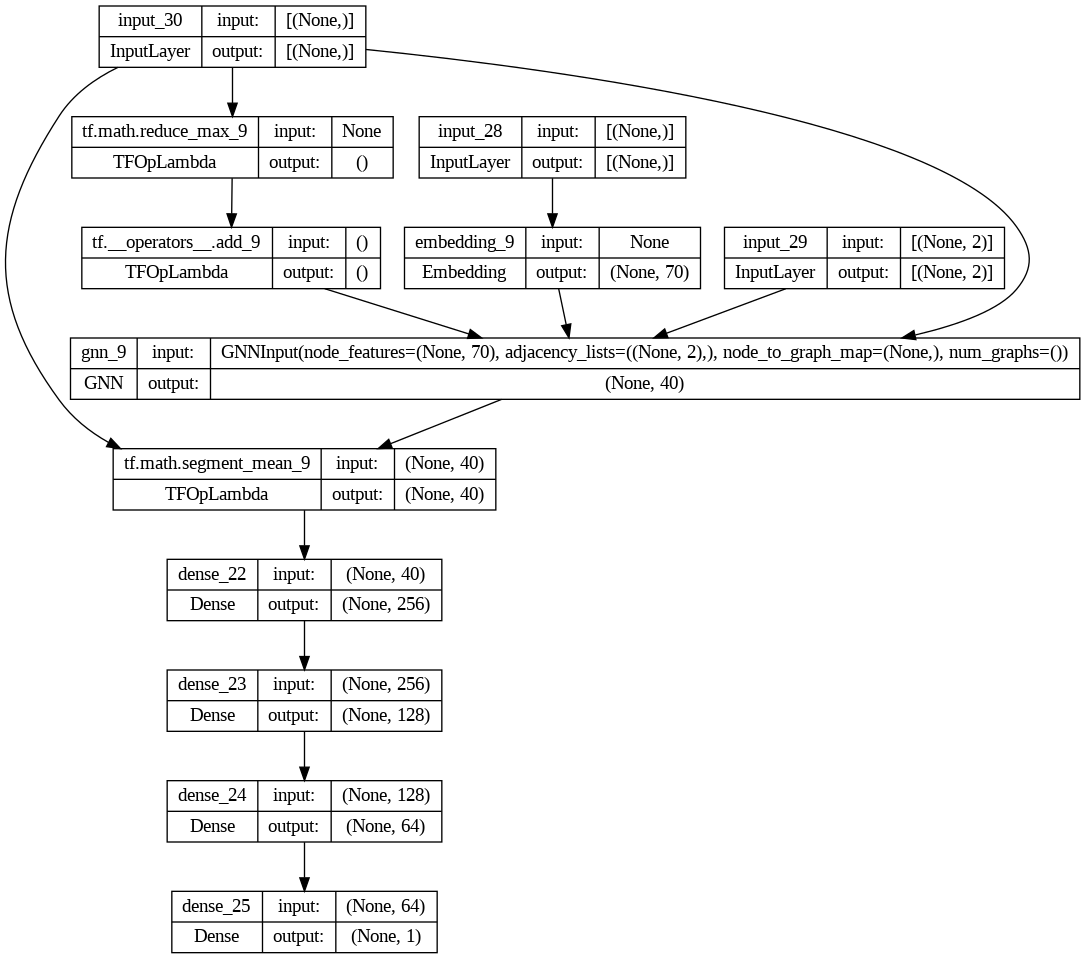

In [116]:
tf.keras.utils.plot_model(model_3, show_shapes=True)

### compile and fit the model

in this trial i expect to get 
* auc score around 95% for training and get 
* 92% for validation 

In [117]:
#compile the model by using adam optimizer and BinaryCrossentropy loss
model_3.compile(
    optimizer = 'adam', 
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [118]:
batch_size = 64

#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)

#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)



In [119]:
#fit the models with 30 epoch and using early stopping to avoid overfitting
hist_3 = model_3.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
  #  callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3),
    verbose=1
)
print(hist_3)

Epoch 1/30
633/633 [==============================] - 20s 21ms/step - loss: 0.6240 - auc: 0.7040 - val_loss: 0.5878 - val_auc: 0.7522
Epoch 2/30
633/633 [==============================] - 12s 19ms/step - loss: 0.5872 - auc: 0.7541 - val_loss: 0.5802 - val_auc: 0.7610
Epoch 3/30
633/633 [==============================] - 11s 18ms/step - loss: 0.5790 - auc: 0.7634 - val_loss: 0.5666 - val_auc: 0.7765
Epoch 4/30
633/633 [==============================] - 11s 18ms/step - loss: 0.5704 - auc: 0.7731 - val_loss: 0.5725 - val_auc: 0.7745
Epoch 5/30
633/633 [==============================] - 12s 19ms/step - loss: 0.5591 - auc: 0.7850 - val_loss: 0.5423 - val_auc: 0.8041
Epoch 6/30
633/633 [==============================] - 11s 18ms/step - loss: 0.5450 - auc: 0.7986 - val_loss: 0.5443 - val_auc: 0.8021
Epoch 7/30
633/633 [==============================] - 11s 17ms/step - loss: 0.5344 - auc: 0.8083 - val_loss: 0.5366 - val_auc: 0.8174
Epoch 8/30
633/633 [==============================] - 11s 18ms

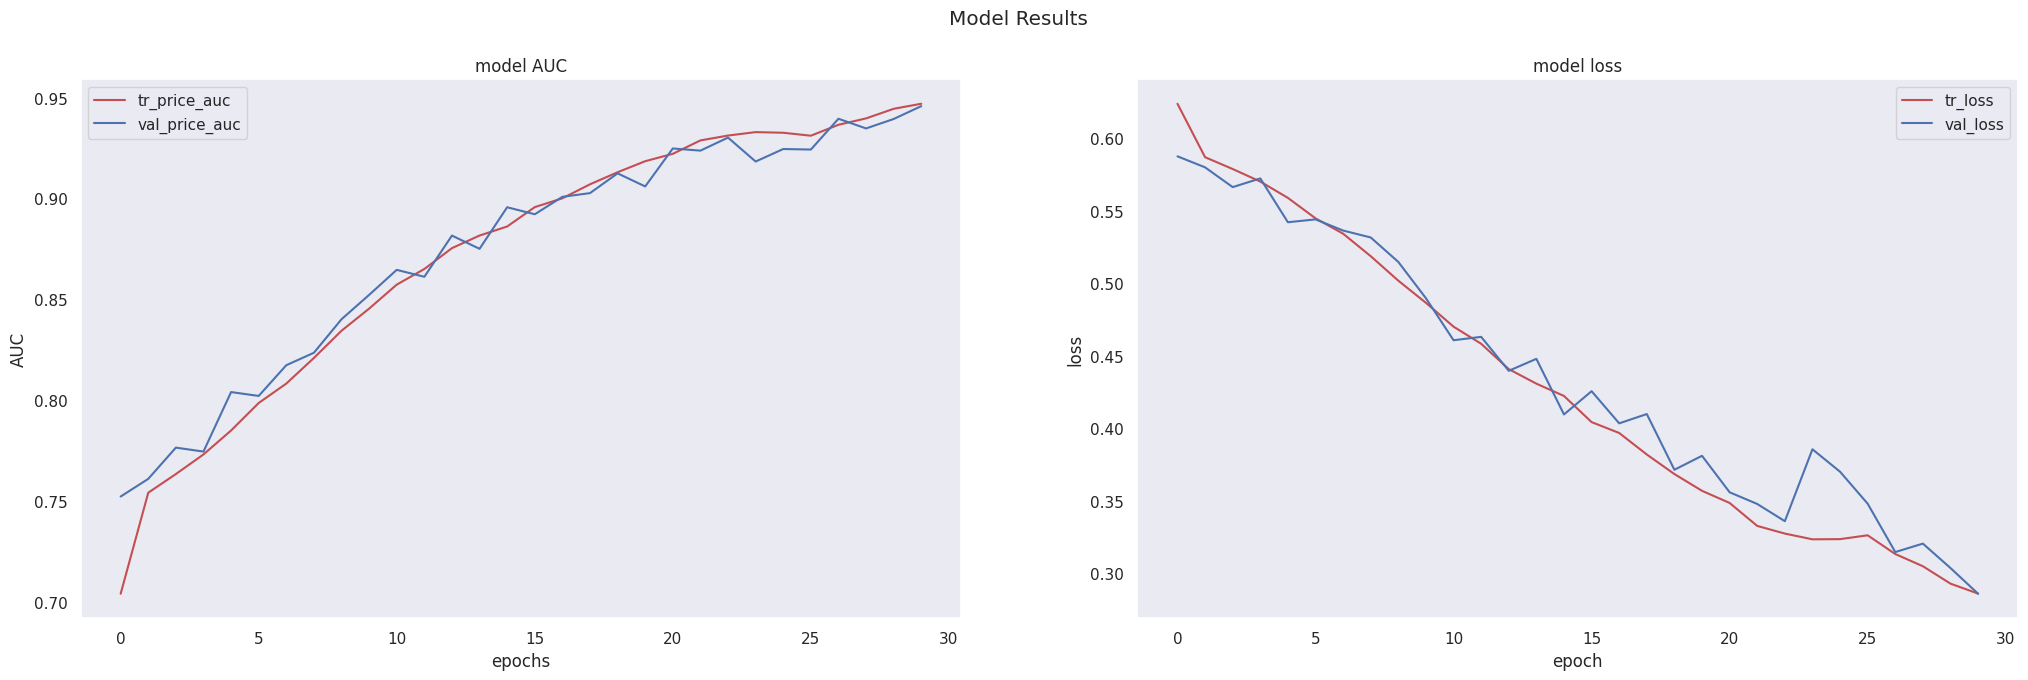

In [120]:
#virtualize the results
results_virt(hist_3)

In [121]:
#make a prediction by using the model
y_pred_3 = model_3.predict(
    gen_batch(testing_set, batch_size=32, shuffle=False)
)
y_pred_3 = np.reshape(y_pred_3, -1)

386/386 [==============================] - 2s 5ms/step


In [122]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred_3})
submission.index.name = 'id'
submission.to_csv('trial_2_3_RGCN.csv')

#Kaggle => 0.82402

> **As we see this model given me**
* around 94.7% training AUC score look like what i expected
* around 94.5% validation AUC score more than what i expected
* so this trial was good but not has any improve so I will try anothr trial to see if the model will improve or not

> **my observation for this results**
* this model has a nice results but this model not the best model until it has a good results but need to some improve to be very good model
* so this model hadn't overfitting or underfitting which is good

## Trial_4 (RGAT)

### build the model architecture

In [123]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

#embedding layer over data with each token embedded as a vector   size vector eg. [440,75]
embeded = Embedding(tokenizer.num_words, 70)(data)

# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer
params["message_calculation_class"] = 'RGAT'
params["hidden_dim"] = 40
params["num_aggr_MLP_hidden_layers"] = 2
params["num_edge_MLP_hidden_layers"] = 2
params["num_heads"] = 8
params["num_layers"] = 4
params["dense_every_num_layers"] = 1
params["film_parameter_MLP_hidden_layers"] = 1



#gnn layer with defined hyperparameters
gnn_layer = GNN(params) 

#gnn output layer
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
#Output [None,8]
fc1 = Dense(64,activation='relu')(avg)
fc2 = Dense(32,activation='relu')(fc1)
# d1 = Dropout(0.2)(fc2)

#output shape: [batch_size,1] 
pred = Dense(1, activation='sigmoid')(fc2)
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model_4 = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='gnn_10/StatefulPartitionedCall:0', description="created by layer 'gnn_10'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='tf.math.segment_mean_10/SegmentMean:0', description="created by layer 'tf.math.segment_mean_10'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_28/Sigmoid:0', description="created by layer 'dense_28'")


### display the model Summary and architecture

In [124]:
#printing summary of the model
model_4.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_33 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_31 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_10 (TFOpLam  ()                  0           ['input_33[0][0]']               
 bda)                                                                                             
                                                                                                  
 embedding_10 (Embedding)       (None, 70)           35000       ['input_31[0][0]']        

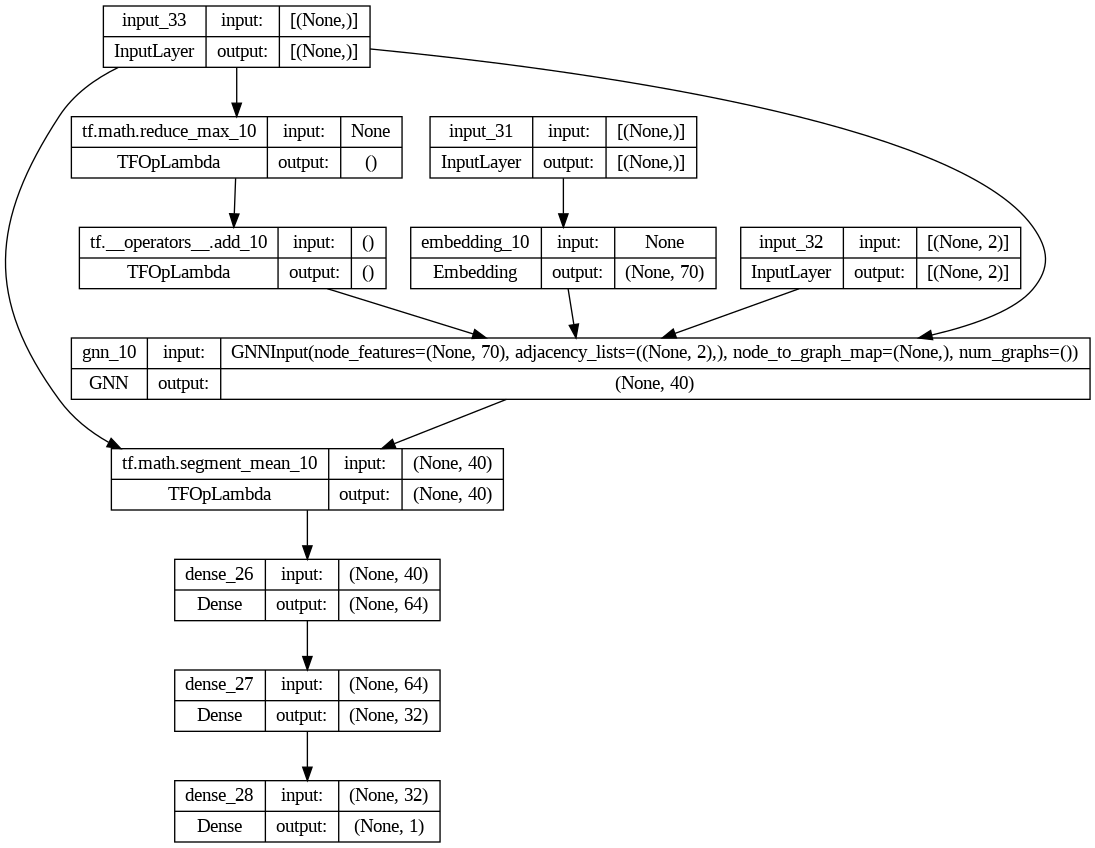

In [125]:
tf.keras.utils.plot_model(model_4, show_shapes=True)

### compile and fit the model

in this trial i expect to get 
* auc score around 95% for training and get 
* 95% for validation 

because i make some improvement

In [126]:
#compile the model by using adam optimizer and BinaryCrossentropy loss
model_4.compile(
    optimizer = 'adam', 
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [127]:
batch_size = 64

#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)

#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)



In [128]:
#fit the models with 30 epoch and using early stopping to avoid overfitting
hist_4 = model_4.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
  #  callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3),
    # verbose=1
)
print(hist_4)

Epoch 1/30
633/633 [==============================] - 38s 44ms/step - loss: 0.6214 - auc: 0.7086 - val_loss: 0.5880 - val_auc: 0.7457
Epoch 2/30
633/633 [==============================] - 26s 41ms/step - loss: 0.5888 - auc: 0.7493 - val_loss: 0.5789 - val_auc: 0.7593
Epoch 3/30
633/633 [==============================] - 26s 41ms/step - loss: 0.5771 - auc: 0.7622 - val_loss: 0.5607 - val_auc: 0.7810
Epoch 4/30
633/633 [==============================] - 26s 41ms/step - loss: 0.5576 - auc: 0.7859 - val_loss: 0.5356 - val_auc: 0.8083
Epoch 5/30
633/633 [==============================] - 26s 41ms/step - loss: 0.5329 - auc: 0.8098 - val_loss: 0.5195 - val_auc: 0.8243
Epoch 6/30
633/633 [==============================] - 26s 41ms/step - loss: 0.5187 - auc: 0.8223 - val_loss: 0.5056 - val_auc: 0.8335
Epoch 7/30
633/633 [==============================] - 25s 40ms/step - loss: 0.5033 - auc: 0.8344 - val_loss: 0.5039 - val_auc: 0.8363
Epoch 8/30
633/633 [==============================] - 26s 41ms

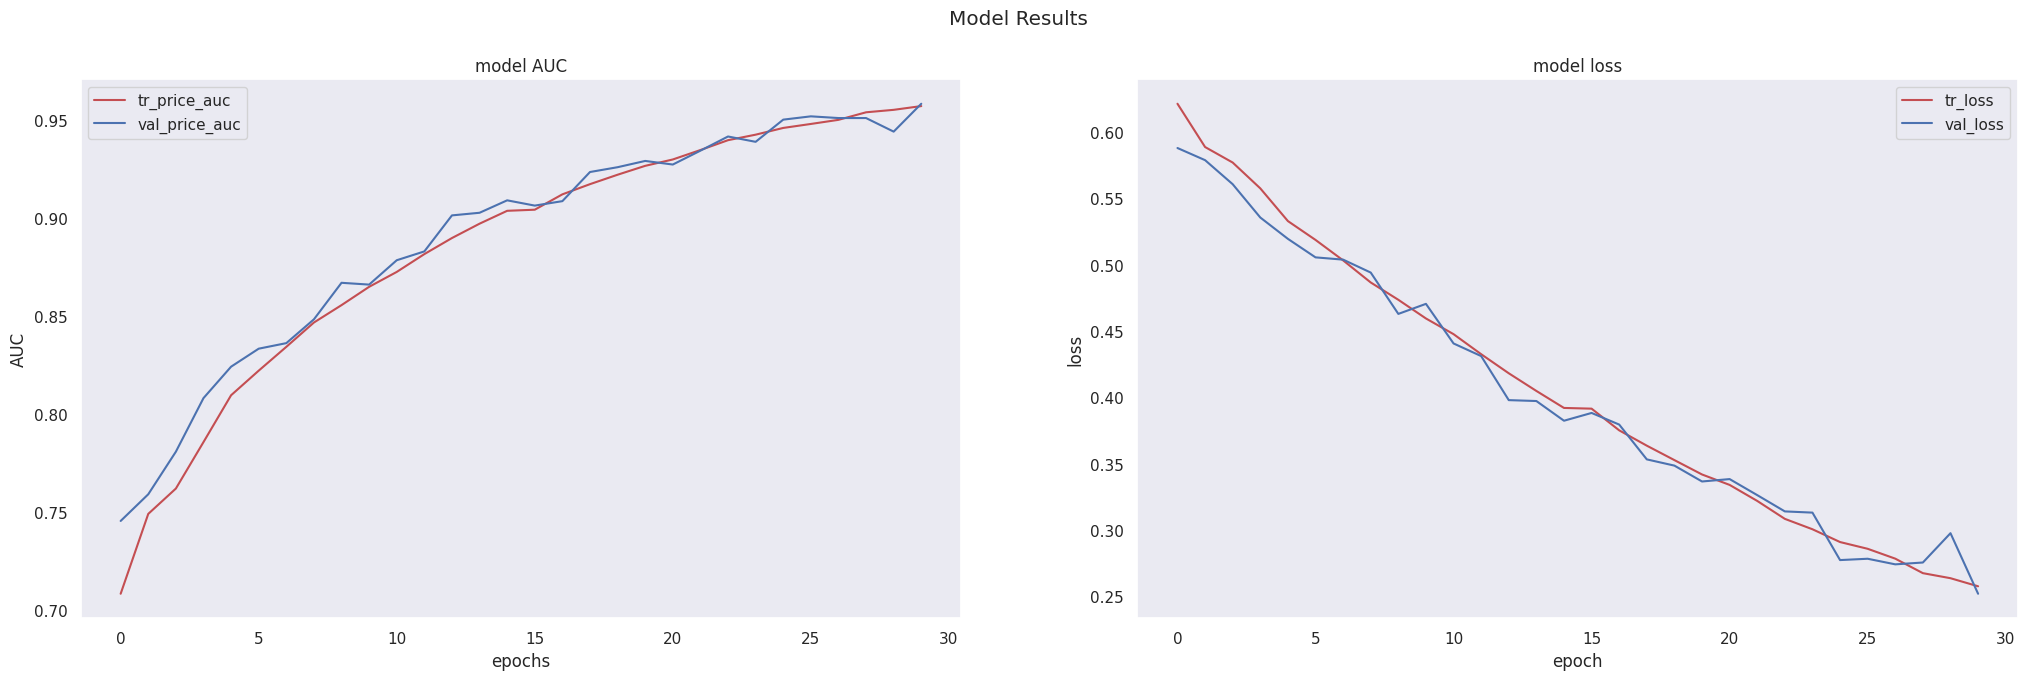

In [129]:
#virtualize the results
results_virt(hist_4)

In [130]:
#make a prediction by using the model
y_pred_4 = model_4.predict(
    gen_batch(testing_set, batch_size=32, shuffle=False)
)
y_pred_4 = np.reshape(y_pred_4, -1)

386/386 [==============================] - 4s 10ms/step


In [131]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred_4})
submission.index.name = 'id'
submission.to_csv('trial_2_4_RGAT.csv')

> **As we see this model given me**
* around 96% training AUC score so close to my expectation
* around 96% validation AUC score so close to my expectation
* So we see that this trial is a little better than the previous one
* so this trial was good but not the best one so I will try anothr trial to see if the model will improve or not

> **my observation for this results**
* this model has a nice results but this model not the best model until it has a good results but need to some improve to be very good model
* so this model hadn't overfitting or underfitting which is good

## Trial_5 (RGIN)

> in this trial i will use the RGIN model with some dense layers to see if there is any improve or not

### build the model architecture

In [132]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

#embedding layer over data with each token embedded as a vector   size vector eg. [440,75]
embeded = Embedding(tokenizer.num_words, 80)(data)

# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer

params["message_calculation_class"] = 'RGIN'
params["hidden_dim"] = 40
params["num_aggr_MLP_hidden_layers"] = 2
params["num_edge_MLP_hidden_layers"] = 2
params["num_heads"] = 8
params["num_layers"] = 4
params["dense_every_num_layers"] = 1
params["film_parameter_MLP_hidden_layers"] = 1



#gnn layer with defined hyperparameters
gnn_layer = GNN(params) 

#gnn output layer
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
#Output [None,8]
fc1 = Dense(64,activation='relu')(avg)
fc2 = Dense(32,activation='relu')(fc1)
# d1 = Dropout(0.2)(fc2)

#output shape: [batch_size,1] 
pred = Dense(1, activation='sigmoid')(fc2)
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model_5 = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='gnn_11/StatefulPartitionedCall:0', description="created by layer 'gnn_11'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='tf.math.segment_mean_11/SegmentMean:0', description="created by layer 'tf.math.segment_mean_11'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_31/Sigmoid:0', description="created by layer 'dense_31'")


### display the model Summary and architecture

In [133]:
#printing summary of the model
model_5.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_36 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_34 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_11 (TFOpLam  ()                  0           ['input_36[0][0]']               
 bda)                                                                                             
                                                                                                  
 embedding_11 (Embedding)       (None, 80)           40000       ['input_34[0][0]']        

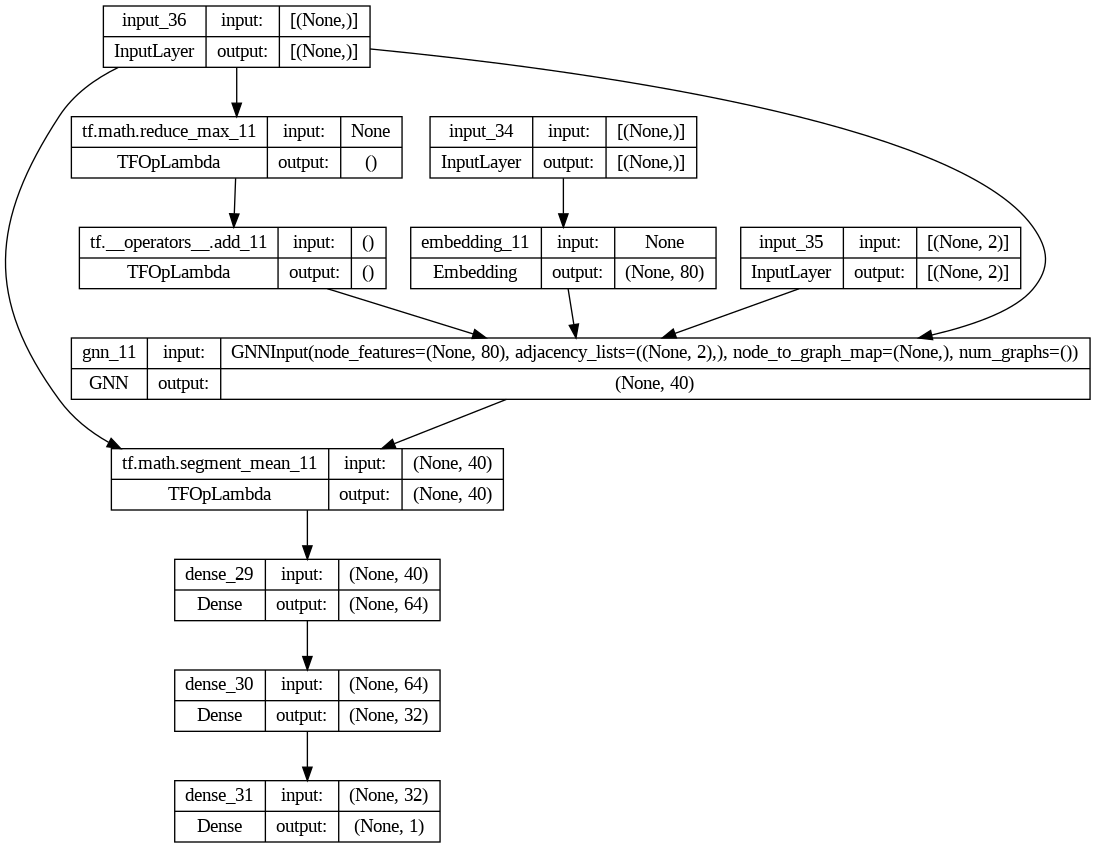

In [134]:
tf.keras.utils.plot_model(model_5, show_shapes=True)

### compile and fit the model

in this trial i expect to get 
* auc score around 90% for training and get 
* 85% for validation 

because this model was not very good in the previous trial 

In [135]:
#compile the model by using adam optimizer and BinaryCrossentropy loss
model_5.compile(
    optimizer = 'adam', 
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [136]:
batch_size = 64

#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)

#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)



In [137]:
#fit the models with 30 epoch and using early stopping to avoid overfitting
hist_5 = model_5.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=64, repeat=True
    ),
    validation_steps=num_batchs_validation,
    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3),
    # verbose=1
)
print(hist_5)

Epoch 1/30
633/633 [==============================] - 25s 25ms/step - loss: 0.6252 - auc: 0.6983 - val_loss: 0.6033 - val_auc: 0.7380
Epoch 2/30
633/633 [==============================] - 13s 21ms/step - loss: 0.5977 - auc: 0.7388 - val_loss: 0.5945 - val_auc: 0.7492
Epoch 3/30
633/633 [==============================] - 13s 21ms/step - loss: 0.5808 - auc: 0.7613 - val_loss: 0.5837 - val_auc: 0.7657
Epoch 4/30
633/633 [==============================] - 13s 20ms/step - loss: 0.5728 - auc: 0.7710 - val_loss: 0.5746 - val_auc: 0.7814
Epoch 5/30
633/633 [==============================] - 13s 21ms/step - loss: 0.5668 - auc: 0.7773 - val_loss: 0.5674 - val_auc: 0.7790
Epoch 6/30
633/633 [==============================] - 13s 20ms/step - loss: 0.5625 - auc: 0.7820 - val_loss: 0.5532 - val_auc: 0.7918
Epoch 7/30
633/633 [==============================] - 13s 21ms/step - loss: 0.5546 - auc: 0.7898 - val_loss: 0.5485 - val_auc: 0.7958
Epoch 8/30
633/633 [==============================] - 13s 20ms

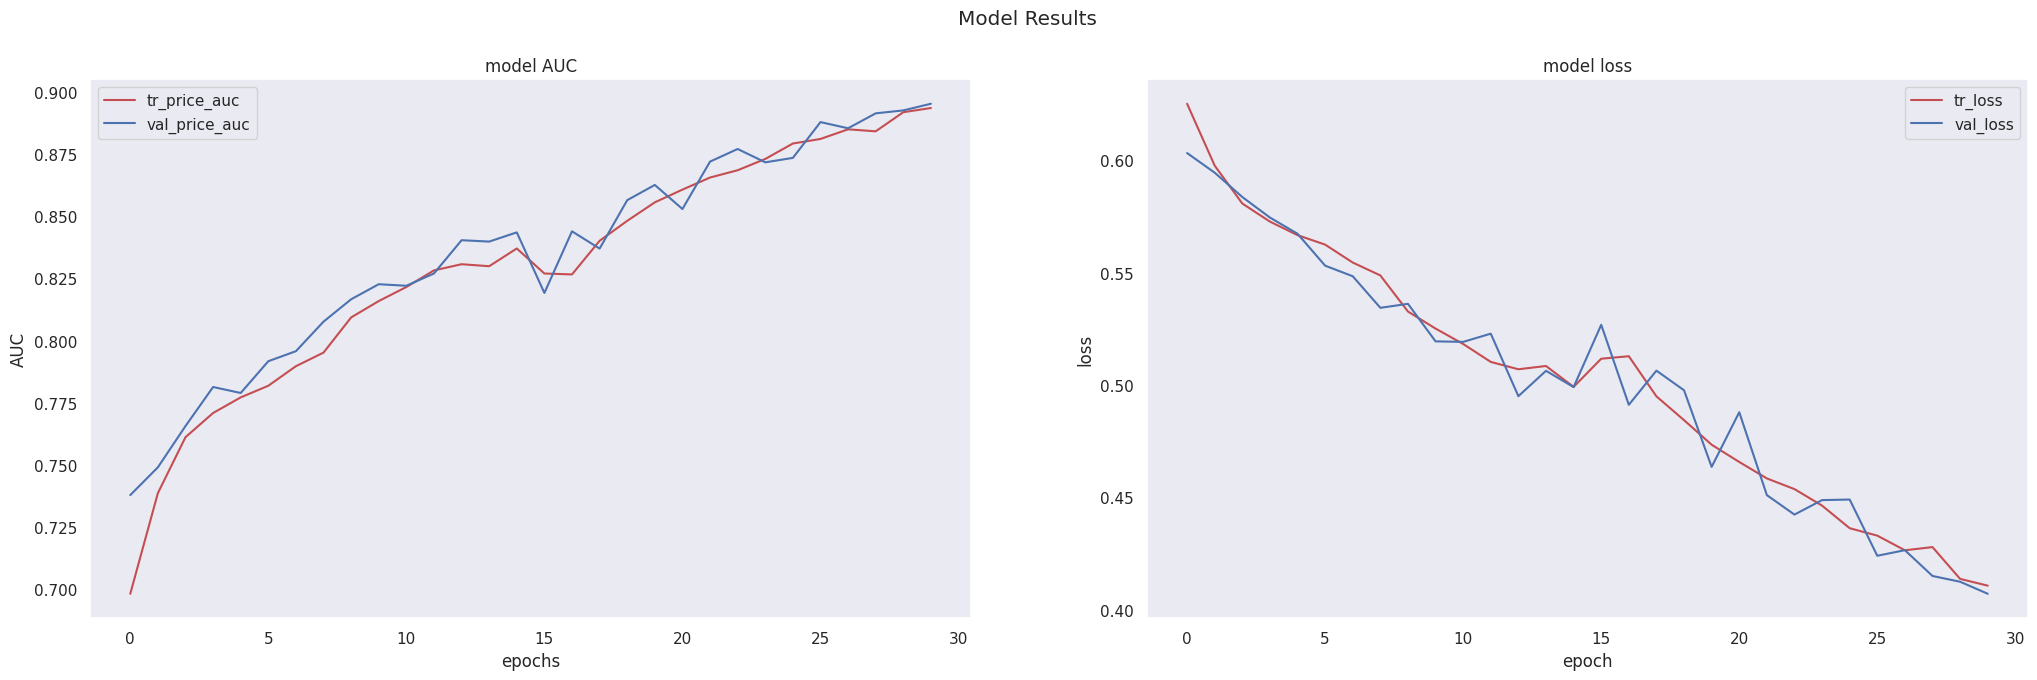

In [138]:
#virtualize the results
results_virt(hist_5)

In [139]:
#make a prediction by using the model
y_pred_5 = model_5.predict(
    gen_batch(testing_set, batch_size=32, shuffle=False)
)
y_pred_5 = np.reshape(y_pred_5, -1)

386/386 [==============================] - 2s 5ms/step


In [140]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred_5})
submission.index.name = 'id'
submission.to_csv('trial_2_5_RGIN.csv')

> **As we see this model given me**
* around 89.3% training AUC score so close to my expectation
* around 89.5% validation AUC score more than my expectation
* So we see that this trial is a bad trial in this Trials after i made a resampling 
* so I will try anothr trial to see if the model will improve or not

> **my observation for this results**
*This model has fairly good results but not a good one that I have built but need to some improve to be very good model
* this model has very bad loss score which has losses around 42% and 40% which so bad

## Trial_6 (GNN-Edge-ML)

### build the model architecture

In [141]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

#embedding layer over data with each token embedded as a vector   size vector eg. [440,75]
embeded = Embedding(tokenizer.num_words, 80)(data)

# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer
params["message_calculation_class"] = 'gnn_edge_mlp'
params["hidden_dim"] = 40
params["num_aggr_MLP_hidden_layers"] = 2
params["num_edge_MLP_hidden_layers"] = 2
params["num_heads"] = 8
params["num_layers"] = 4
params["dense_every_num_layers"] = 1
params["film_parameter_MLP_hidden_layers"] = 1



#gnn layer with defined hyperparameters
gnn_layer = GNN(params) 

#gnn output layer
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
#Output [None,8]
fc1 = Dense(64,activation='relu')(avg)
fc2 = Dense(32,activation='relu')(fc1)
# d1 = Dropout(0.2)(fc2)

#output shape: [batch_size,1] 
pred = Dense(1, activation='sigmoid')(fc2)
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model_6 = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='gnn_12/StatefulPartitionedCall:0', description="created by layer 'gnn_12'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='tf.math.segment_mean_12/SegmentMean:0', description="created by layer 'tf.math.segment_mean_12'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_34/Sigmoid:0', description="created by layer 'dense_34'")


### display the model Summary and architecture

In [142]:
#printing summary of the model
model_6.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_37 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_12 (TFOpLam  ()                  0           ['input_39[0][0]']               
 bda)                                                                                             
                                                                                                  
 embedding_12 (Embedding)       (None, 80)           40000       ['input_37[0][0]']        

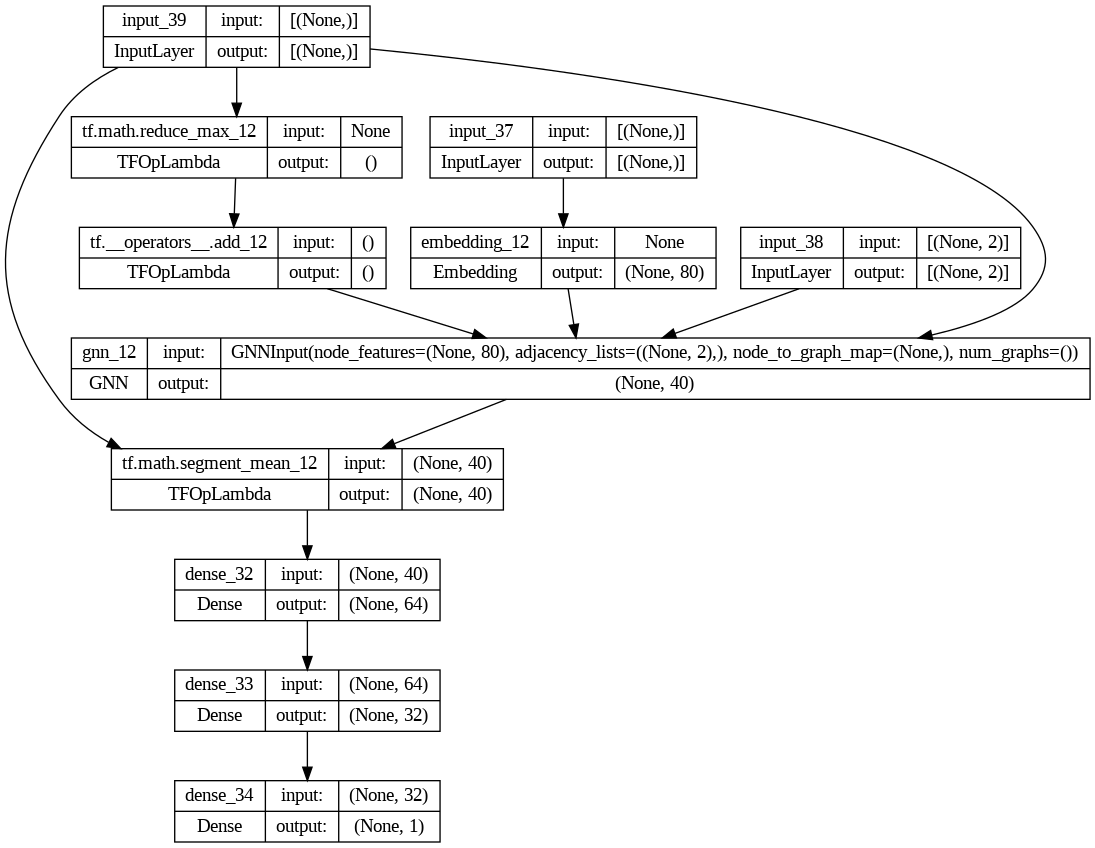

In [143]:
tf.keras.utils.plot_model(model_6, show_shapes=True)

### compile and fit the model

in this trial i expect to get 
* auc score around 94% for training and get 
* 90% for validation 

because this model was not the best one in the first trial

In [144]:
#compile the model by using adam optimizer and BinaryCrossentropy loss
model_6.compile(
    optimizer = 'adam', 
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [145]:
batch_size = 64

#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)

#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)



In [146]:
#fit the models with 30 epoch and using early stopping to avoid overfitting
hist_6 = model_6.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
  #  callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3),
    # verbose=1
)
print(hist_6)

Epoch 1/30
633/633 [==============================] - 20s 21ms/step - loss: 0.6229 - auc: 0.7073 - val_loss: 0.6015 - val_auc: 0.7437
Epoch 2/30
633/633 [==============================] - 11s 18ms/step - loss: 0.5916 - auc: 0.7500 - val_loss: 0.5952 - val_auc: 0.7580
Epoch 3/30
633/633 [==============================] - 12s 18ms/step - loss: 0.5751 - auc: 0.7681 - val_loss: 0.5712 - val_auc: 0.7837
Epoch 4/30
633/633 [==============================] - 11s 17ms/step - loss: 0.5614 - auc: 0.7827 - val_loss: 0.5588 - val_auc: 0.7853
Epoch 5/30
633/633 [==============================] - 11s 17ms/step - loss: 0.5628 - auc: 0.7804 - val_loss: 0.5755 - val_auc: 0.7751
Epoch 6/30
633/633 [==============================] - 11s 18ms/step - loss: 0.5535 - auc: 0.7898 - val_loss: 0.5401 - val_auc: 0.8068
Epoch 7/30
633/633 [==============================] - 11s 18ms/step - loss: 0.5329 - auc: 0.8087 - val_loss: 0.5290 - val_auc: 0.8176
Epoch 8/30
633/633 [==============================] - 11s 18ms

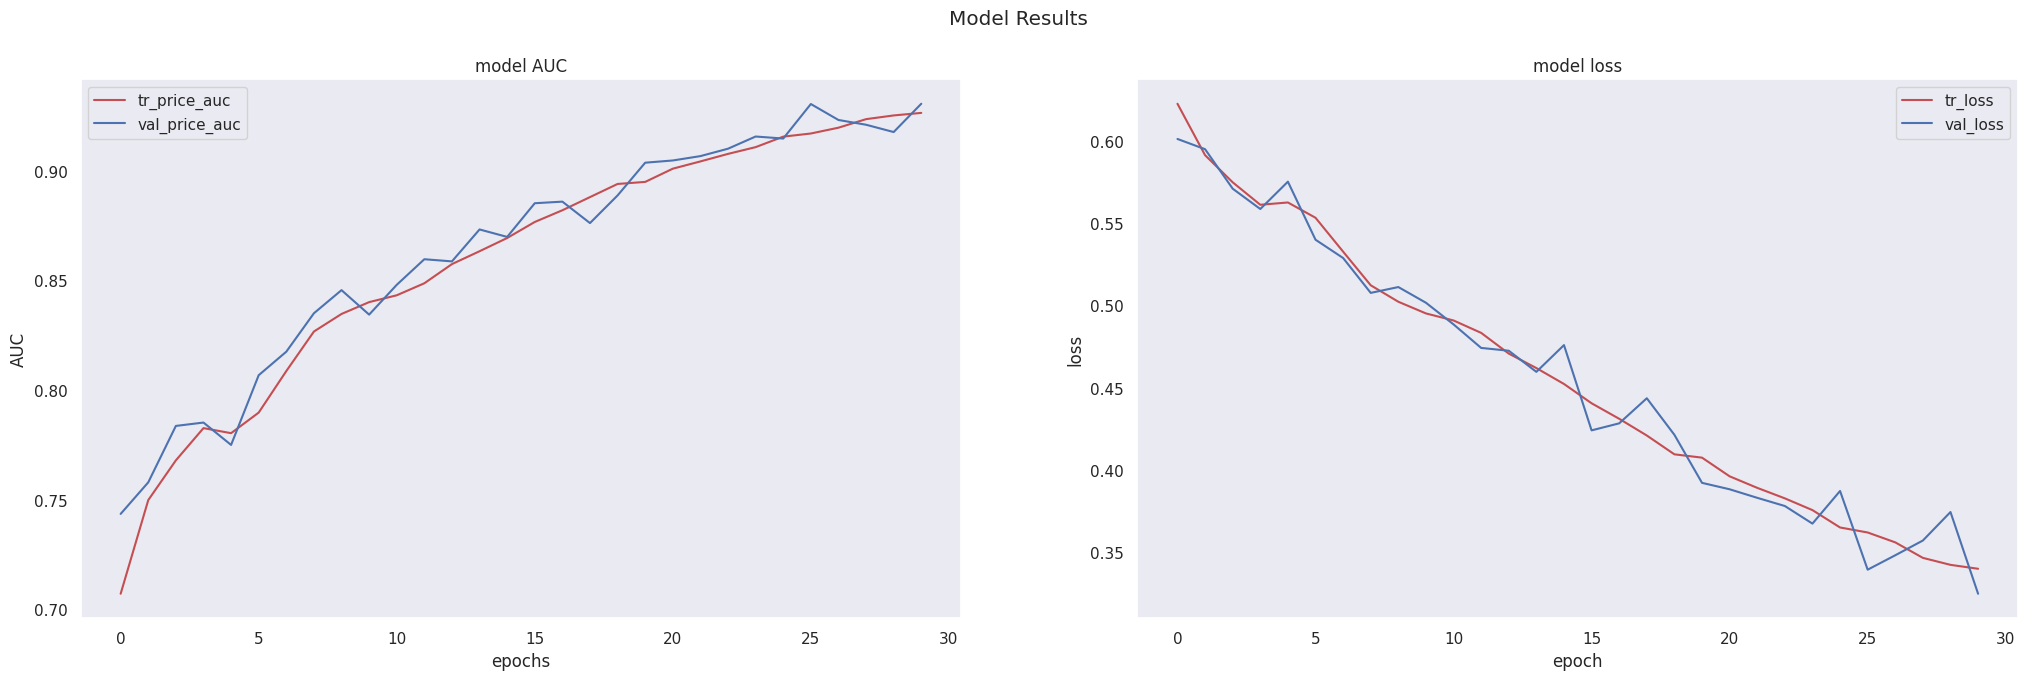

In [147]:
#virtualize the results
results_virt(hist_6)

In [148]:
#make a prediction by using the model
y_pred_6 = model_6.predict(
    gen_batch(testing_set, batch_size=32, shuffle=False)
)
y_pred_6 = np.reshape(y_pred_6, -1)

386/386 [==============================] - 2s 5ms/step


In [149]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred_6})
submission.index.name = 'id'
submission.to_csv('trial_6_GNN-Edge-ML.csv')

> **As we see this model given me**
* around 92.6% training AUC score look like to my expectation
* around 93% validation AUC score more than my expectation
* So we see that this trial is a good trial and this trial is better than the previous one which is good
* so I will try anothr trial to see if the model will improve or not

> **my observation for this results**
* This model has fairly good results but not a good one that I have built but need to some improve to be very good model
* this model has little high losses scores which has losses around 30% and 30% which it's not good

## Trial_7 (GNN-FiLM)

### build the model architecture

In [150]:
#Input layer for nodes (tokenized text data)
data = keras.Input(batch_shape=(None,))

# the first dim is different to the previous one. it is the total number of edges in this batch
#Input layer for edge data
edge = keras.Input(batch_shape=(None, 2), dtype=tf.int32)
#Input layer for node2graph ids
node2graph = keras.Input(batch_shape=(None,), dtype=tf.int32)

#embedding layer over data with each token embedded as a vector   size vector eg. [440,75]
embeded = Embedding(tokenizer.num_words, 80)(data)

# number of graphs (number of samples)
#calculating number of samples (or min(batch_size,no._of_samples))
num_graph = tf.reduce_max(node2graph)+1  

#gnn_input layer with inputs as defined above
gnn_input = GNNInput(
    node_features=embeded,
    adjacency_lists=(edge,),
    node_to_graph_map=node2graph, 
    num_graphs=num_graph,
)

#defining hyperparameters for GNN layer
params = GNN.get_default_hyperparameters()
#defining hidden dimension of the gnn layer

params["message_calculation_class"] = 'GNN_FiLM'
params["hidden_dim"] = 40
params["num_aggr_MLP_hidden_layers"] = 2
params["num_edge_MLP_hidden_layers"] = 2
params["num_heads"] = 8
params["num_layers"] = 4
params["dense_every_num_layers"] = 1
params["film_parameter_MLP_hidden_layers"] = 1



#gnn layer with defined hyperparameters
gnn_layer = GNN(params) 

#gnn output layer
#outpur shape: [data_dimension,hidden layers]
gnn_out = gnn_layer(gnn_input)

print('gnn_out', gnn_out)           

#calculating segmented mean based on segment_ids
avg = segment_mean(
    data=gnn_out,
    segment_ids=node2graph
    )

print('mean:', avg)

#final dense layer with sigmoid
#Output [None,8]
fc1 = Dense(64,activation='relu')(avg)
fc2 = Dense(32,activation='relu')(fc1)
# d1 = Dropout(0.2)(fc2)

#output shape: [batch_size,1] 
pred = Dense(1, activation='sigmoid')(fc2)
print('pred:', pred)

#Building The Model 
#inputs is dictionary of data, edges, node2graph
#output: prediction value from dense layer
model_7 = Model(
    inputs={
        'data': data, 
        'edges': edge,
        'node2grah': node2graph,
    },
    outputs=pred
)

gnn_out KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='gnn_13/StatefulPartitionedCall:0', description="created by layer 'gnn_13'")
mean: KerasTensor(type_spec=TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), name='tf.math.segment_mean_13/SegmentMean:0', description="created by layer 'tf.math.segment_mean_13'")
pred: KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_37/Sigmoid:0', description="created by layer 'dense_37'")


### display the model Summary and architecture

In [151]:
#printing summary of the model
model_7.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_42 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 input_40 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 tf.math.reduce_max_13 (TFOpLam  ()                  0           ['input_42[0][0]']               
 bda)                                                                                             
                                                                                                  
 embedding_13 (Embedding)       (None, 80)           40000       ['input_40[0][0]']        

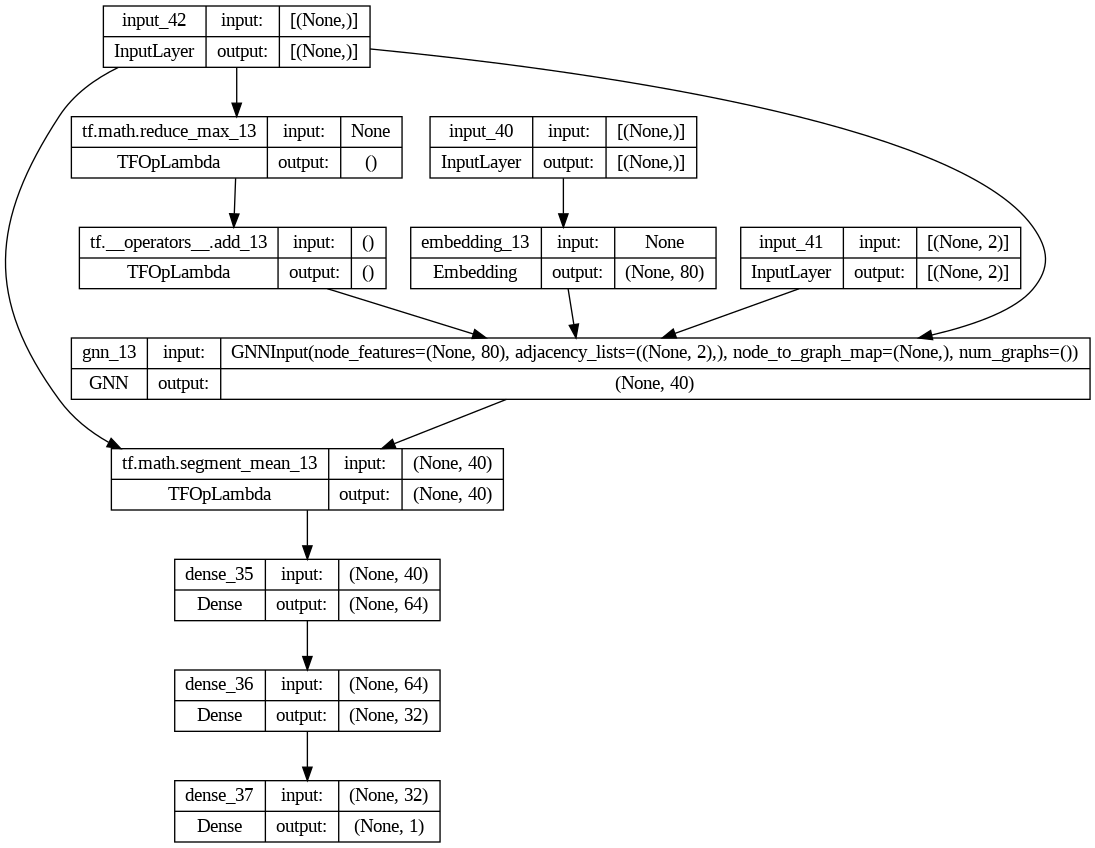

In [152]:
tf.keras.utils.plot_model(model_7, show_shapes=True)

### compile and fit the model

in this trial i expect to get 
* auc score around 96% for training and get 
* 90% for validation 

because this model was good before resampling so i expect to give me good results

In [153]:
#compile the model by using adam optimizer and BinaryCrossentropy loss
model_7.compile(
    optimizer = 'adam', 
    loss='BinaryCrossentropy',
    metrics=['AUC']
)

In [154]:
batch_size = 64

#math.ceil: returns the smallest integral value greater than the number
#no. of batches for training data
num_batchs = math.ceil(len(training_set) / batch_size)

#no. of batches for validation data
num_batchs_validation = math.ceil(len(validation_set) / batch_size)



In [155]:
#fit the models with 30 epoch and using early stopping to avoid overfitting
hist_7 = model_7.fit(
    gen_batch(
        training_set, batch_size=batch_size, repeat=True
    ),
    steps_per_epoch=num_batchs,
    epochs=30,
    validation_data=gen_batch(
        validation_set, batch_size=32, repeat=True
    ),
    validation_steps=num_batchs_validation,
  #  callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3),
    # verbose=1
)
print(hist_7)

Epoch 1/30
633/633 [==============================] - 25s 27ms/step - loss: 0.6058 - auc: 0.7308 - val_loss: 0.5627 - val_auc: 0.7819
Epoch 2/30
633/633 [==============================] - 14s 22ms/step - loss: 0.5523 - auc: 0.7899 - val_loss: 0.5480 - val_auc: 0.7992
Epoch 3/30
633/633 [==============================] - 14s 21ms/step - loss: 0.5326 - auc: 0.8099 - val_loss: 0.5518 - val_auc: 0.8136
Epoch 4/30
633/633 [==============================] - 13s 20ms/step - loss: 0.4972 - auc: 0.8390 - val_loss: 0.4663 - val_auc: 0.8618
Epoch 5/30
633/633 [==============================] - 13s 20ms/step - loss: 0.4613 - auc: 0.8639 - val_loss: 0.4367 - val_auc: 0.8791
Epoch 6/30
633/633 [==============================] - 13s 21ms/step - loss: 0.4291 - auc: 0.8829 - val_loss: 0.4219 - val_auc: 0.8875
Epoch 7/30
633/633 [==============================] - 12s 20ms/step - loss: 0.4114 - auc: 0.8928 - val_loss: 0.4236 - val_auc: 0.9079
Epoch 8/30
633/633 [==============================] - 13s 21ms

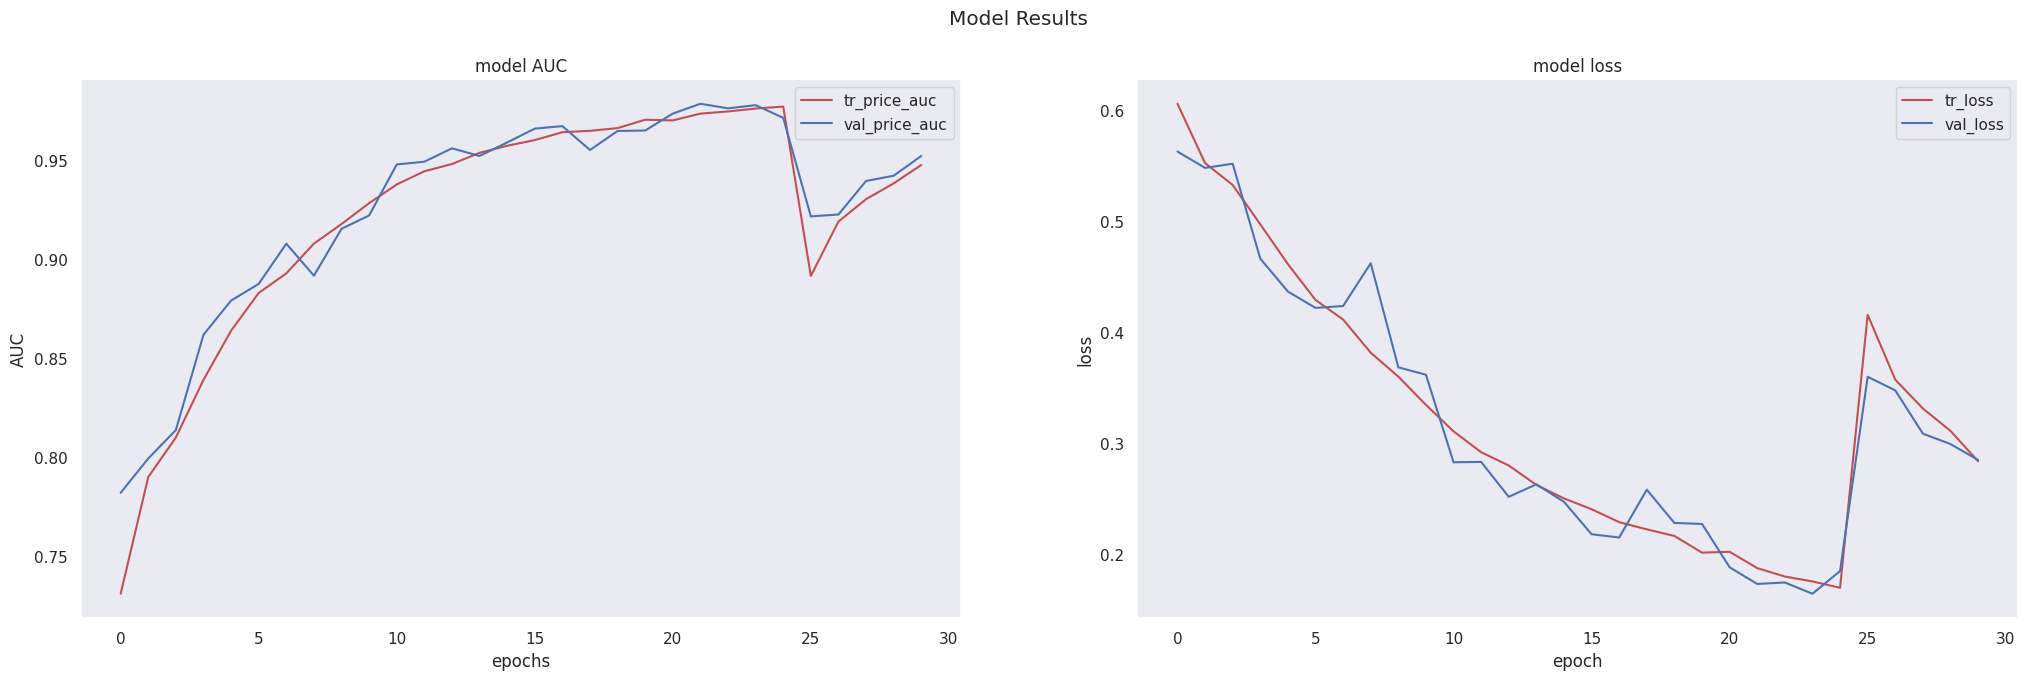

In [156]:
#virtualize the results
results_virt(hist_7)

In [157]:
#make a prediction by using the model
y_pred_7 = model_7.predict(
    gen_batch(testing_set, batch_size=32, shuffle=False)
)
y_pred_7 = np.reshape(y_pred_7, -1)

386/386 [==============================] - 3s 6ms/step


In [158]:
#make a submission file to upload it on kaggle
submission = pd.DataFrame({'label':y_pred_7})
submission.index.name = 'id'
submission.to_csv('trial_2_7_GNN_FiLM.csv')

> **As we see this model given me**
* around 94.7% training AUC so close to my expectation
* around 95.2% validation AUC score better than what i expected so it's good and this is the second best one until now
* so this trial was the second best trial

    **[The second highest scores I get, so this model is the second best one so far]**
> **my observation for this results**
* this model was good to reach this result as we see from the plots
* this model is very good has high scores and has low losses so ***this model is the second best model***
* this model hadn't overfitting or underfitting